In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import das base
df_treino = pd.read_csv("train.csv")
df_treino.head()

016399044a                        023c68873b  0342faceb5  04e7268385  \
0        6447  d19e3b17239b50f7055ea4ea09f15e5a        5372       35812   
1        6416  9f40ab30d26568e05668bf85381dc475        5407       36031   
2        6322  9d4444651ceac919e4fee3ea44bbf44f        5381       35959   
3        6479  53116e9d726bcf4c0a5136460ce4036f        5299       35847   
4        6425  b7d2fb1493994729b2cadc6716cde91e        5386       36016   

   06888ceac9   072b7e8f27  087235d61e  0b846350ef  0e2ab0831c  12eda2d982  \
0           1   171.464188          14   -0.318226    0.207681   76.302524   
1           1   198.668261          44    6.042920   -7.343764   67.815740   
2           1   215.160189          43    0.287232    0.038272   48.315810   
3           1  5610.919136          72    0.023388   -0.043669   26.135256   
4           1   306.835761          19   -0.722365    0.918951   18.337088   

   ...  f0a0febd35                        f1f0984934  f66b98dd69  fbf66c8021  \
0  ...   -5.994271  abe90d9881c0790f47e139cf3e915f2f    0.958330   91.778563   
1  ...   66.551540  0dc8ab4be161195c1c90488d4d9313b7    0.543291   26.234959   
2  ...   63.802229  fd687ed31958a22f80e48865e669987e    0.771631   48.960842   
3  ...   57.495654  b1d448724055697b94a122878757a54a    0.133395    6.236324   
4  ...  203.894922  3d80cf3d6e641fe32f4abc1fd522e0bc    0.176264   19.348591   

   fdf8628ca7  fe0318e273  fe8cdd80ba  ffd1cdcfc1  id    target  
0        1058    1.000501   40.297779    1.740526   0  0.536383  
1        1036    1.000598    6.030759    7.085240   1  0.426536  
2        1039    0.000571   40.269326    5.315980   2  0.498649  
3        1044    1.000704   29.115058    1.783141   3  1.013567  
4         998    1.000581   44.047487    3.219030   4  4.008763  

[5 rows x 108 columns]

In [3]:
### Separando variáveis quantitativas e categóricas
df_cat = df_treino.select_dtypes(include="object")
df_quantitativas = df_treino.drop(df_cat.columns, axis=1)

# Visualizando a distribuição do target
---

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


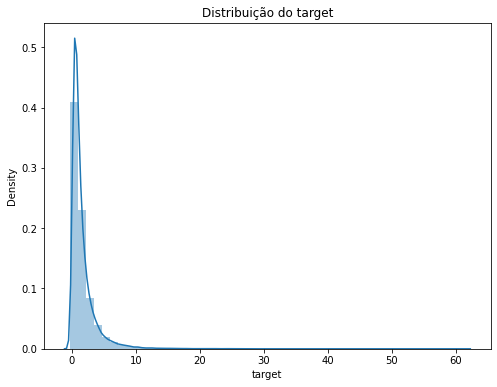

In [4]:
plt.figure(figsize=(8, 6))
sns.distplot(df_treino["target"])
plt.title("Distribuição do target")
plt.show()
# O target é assimétrico á direita, o que é um problema, já que queremos que ele seja o mais perto possível
# de uma distribuição normal

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


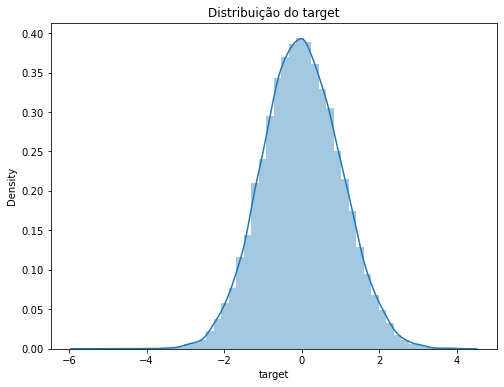

In [5]:
plt.figure(figsize=(8, 6))
sns.distplot(np.log(df_treino["target"]))
plt.title("Distribuição do target")
plt.show()
## Variável após transformação log

# Visualizando como as variáveis se comportam em relação ao target
---

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='target'>

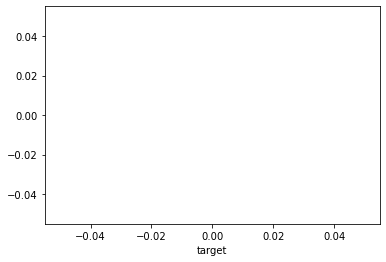

In [6]:
sns.scatterplot(data=df_quantitativas, x=np.log(df_quantitativas["target"]))

C:\Users\Grafite\AppData\Local\Temp\ipykernel_13596\2318225719.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 4))


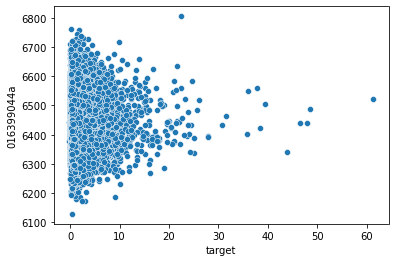

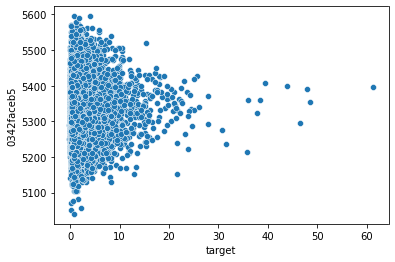

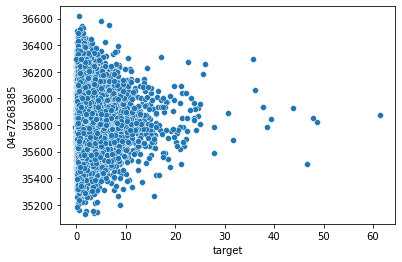

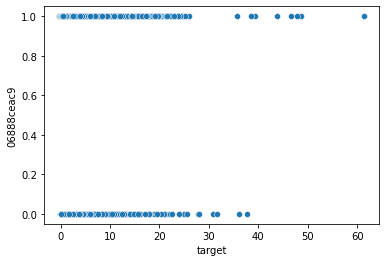

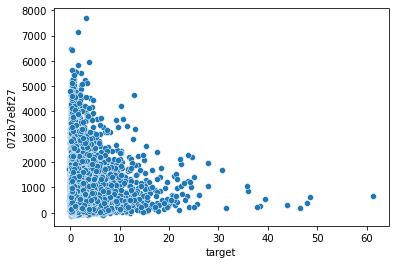

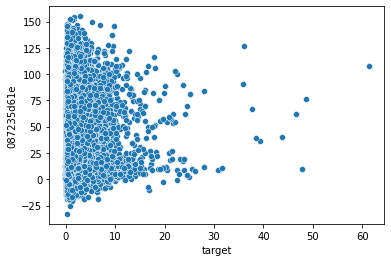

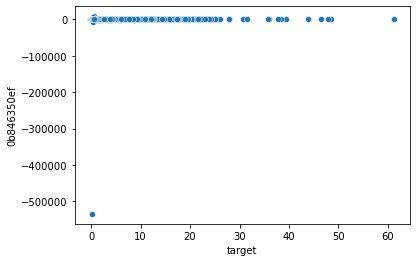

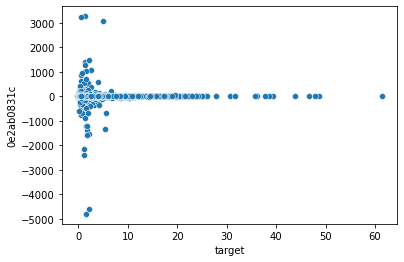

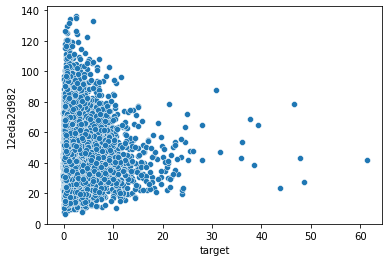

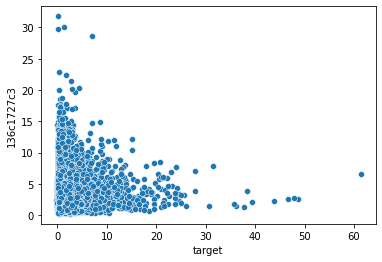

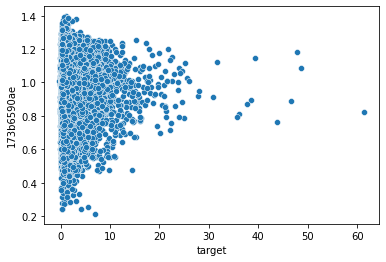

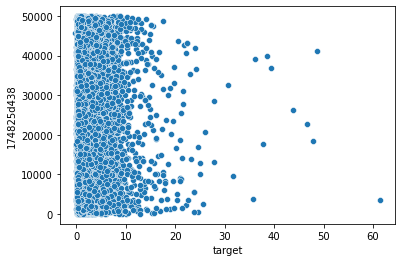

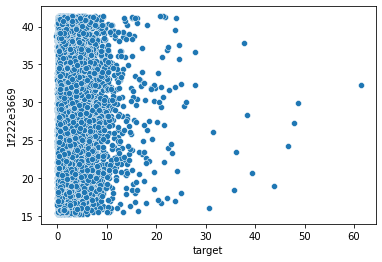

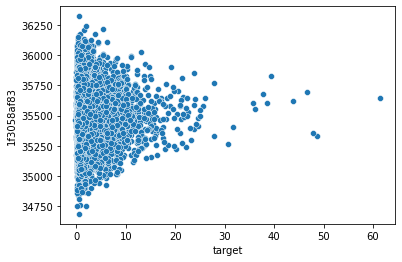

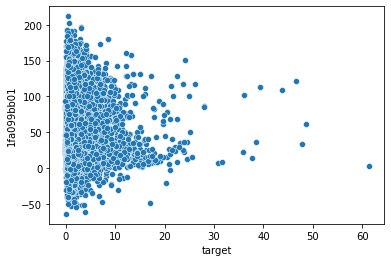

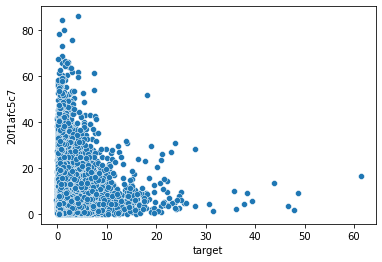

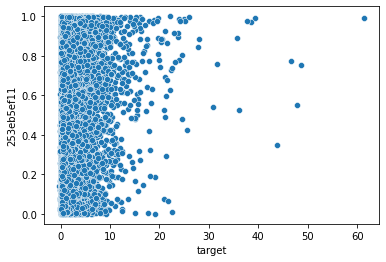

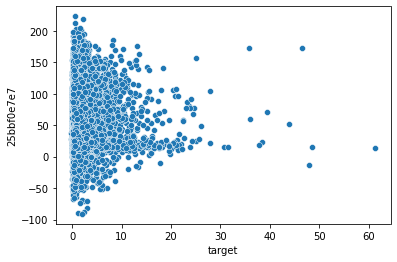

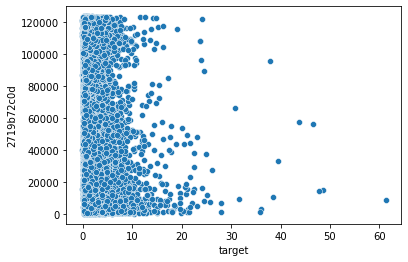

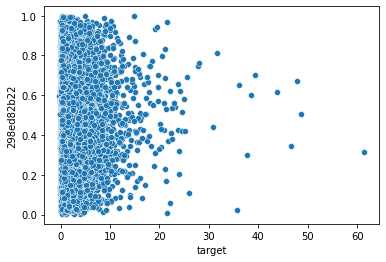

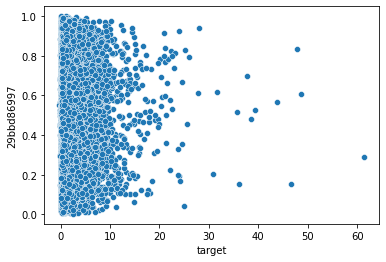

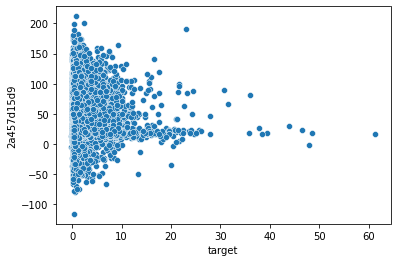

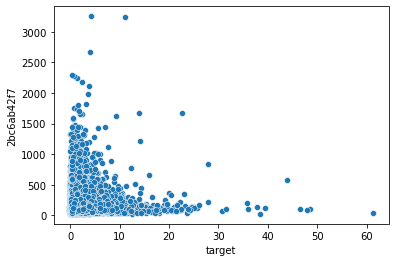

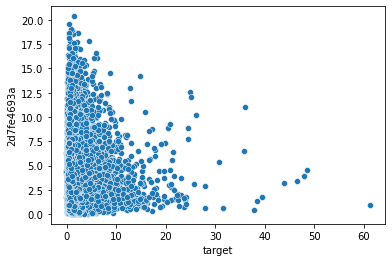

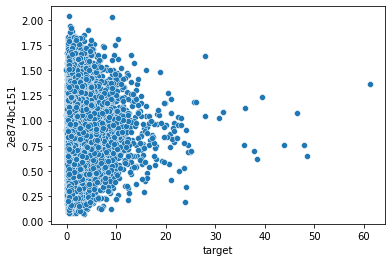

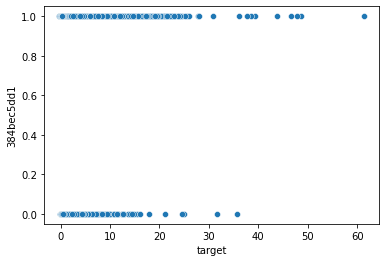

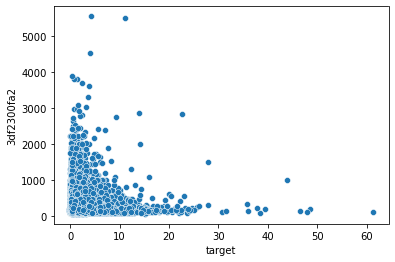

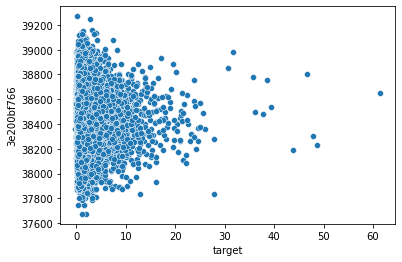

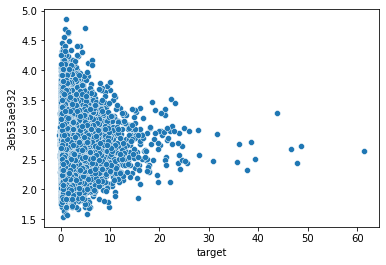

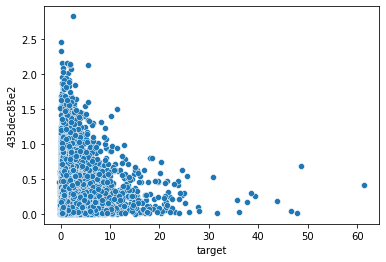

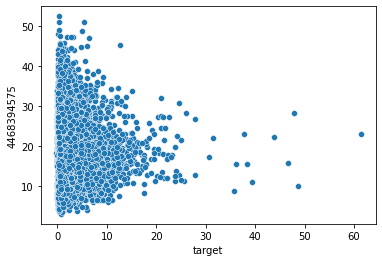

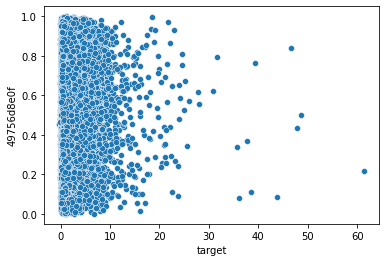

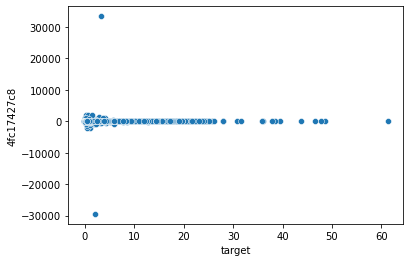

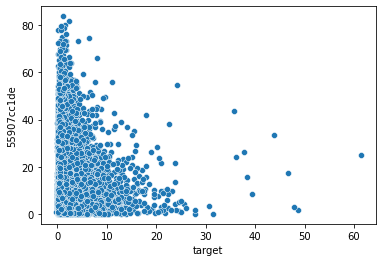

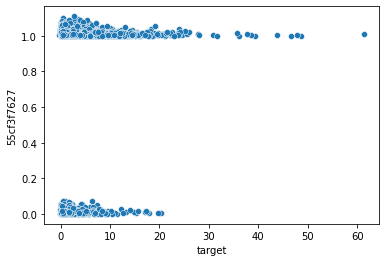

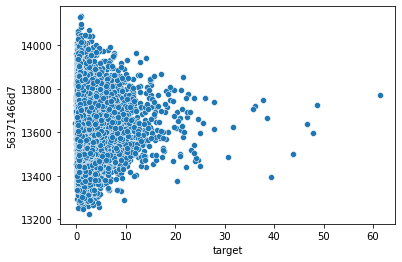

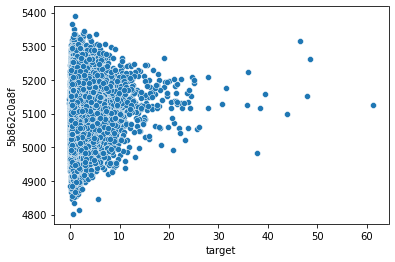

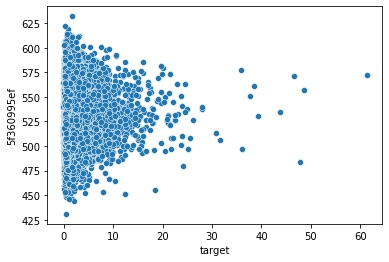

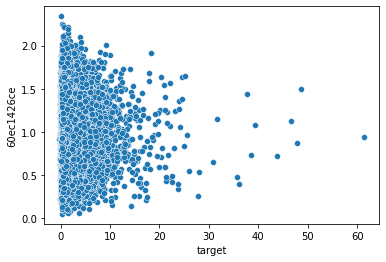

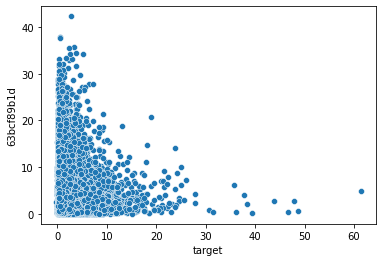

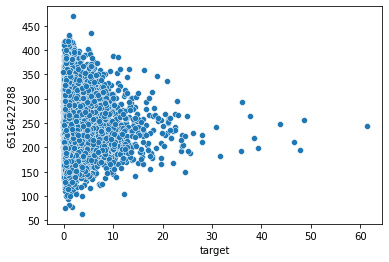

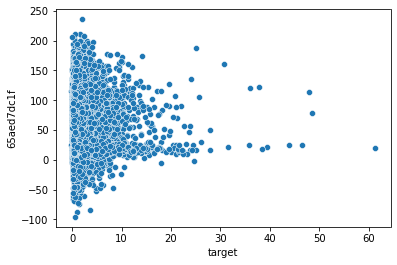

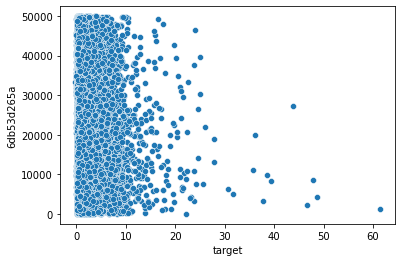

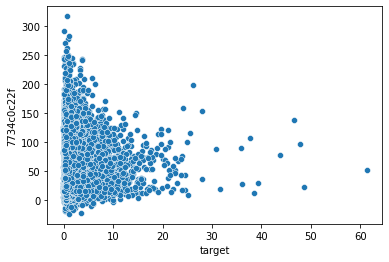

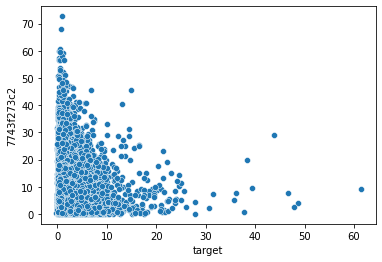

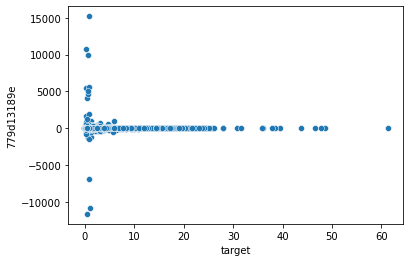

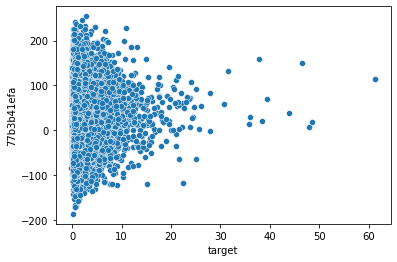

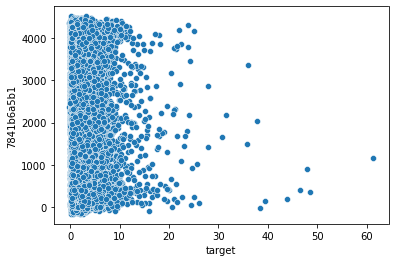

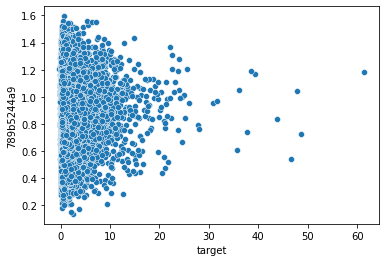

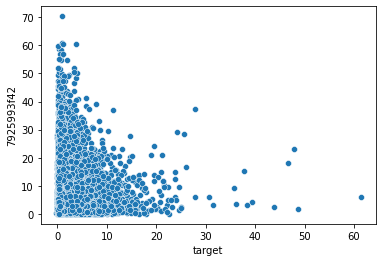

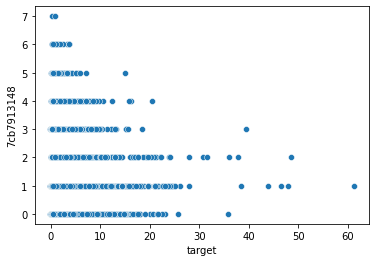

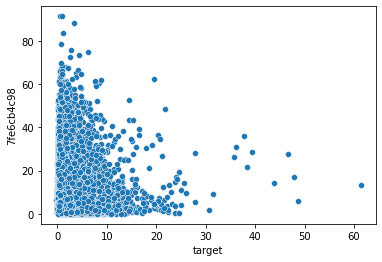

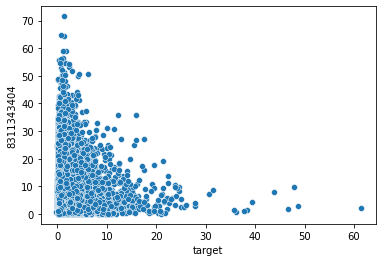

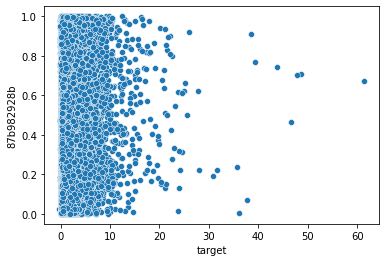

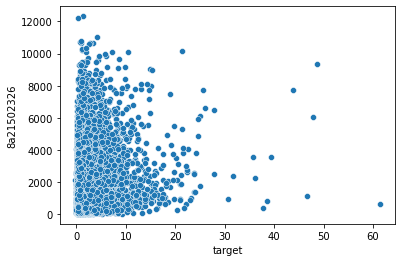

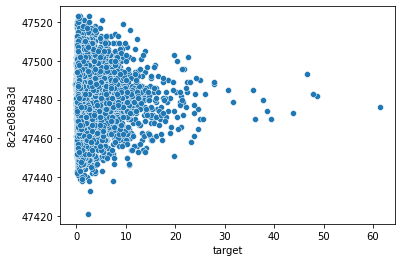

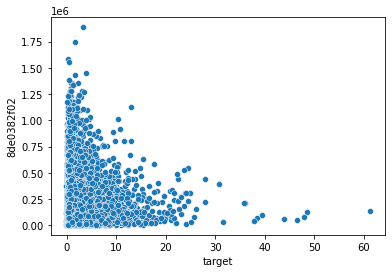

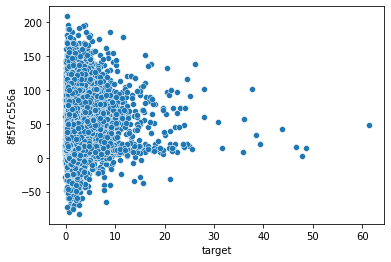

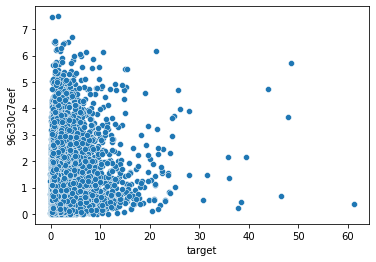

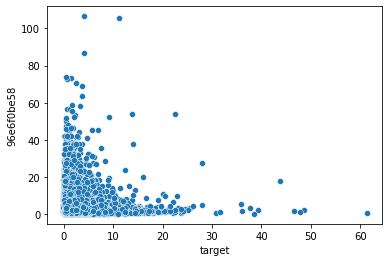

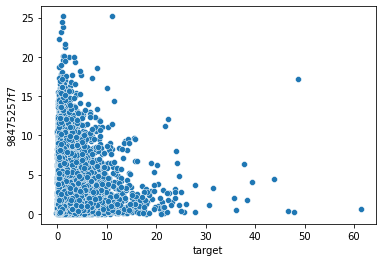

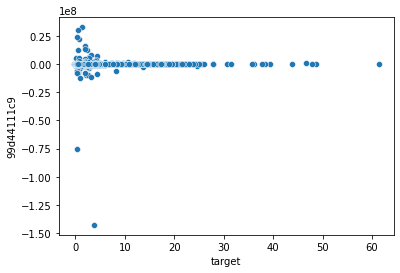

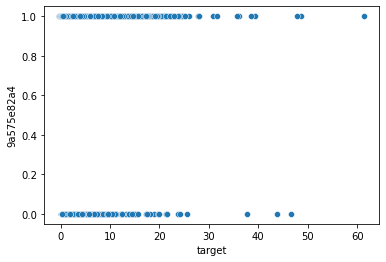

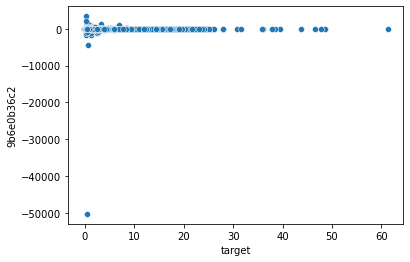

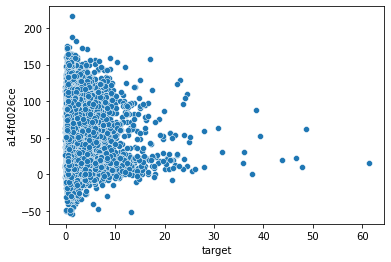

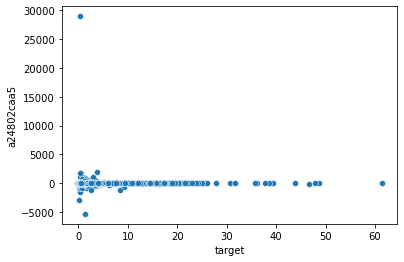

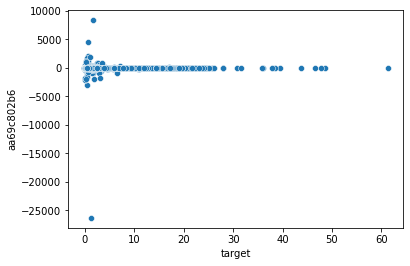

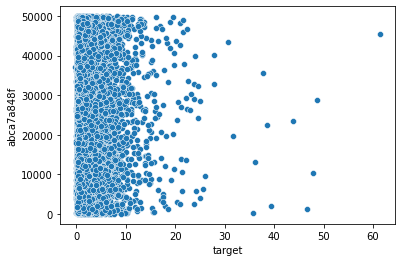

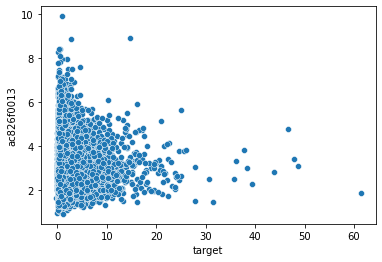

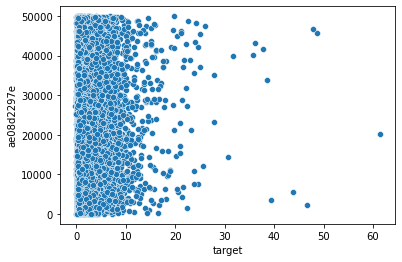

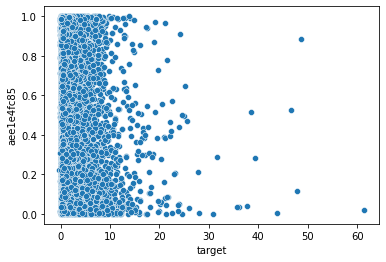

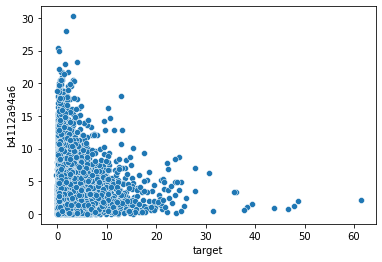

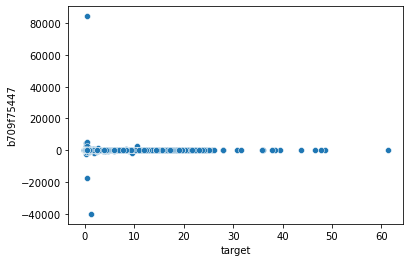

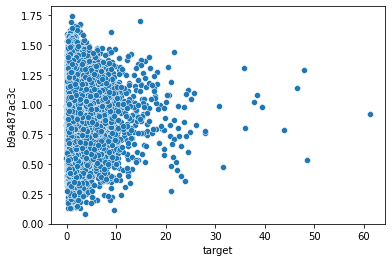

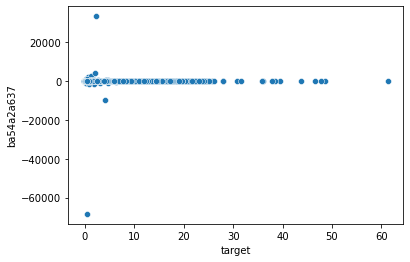

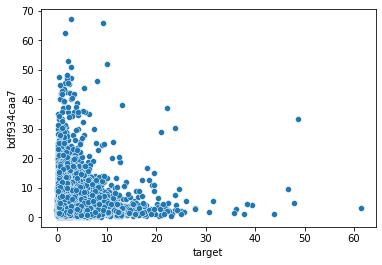

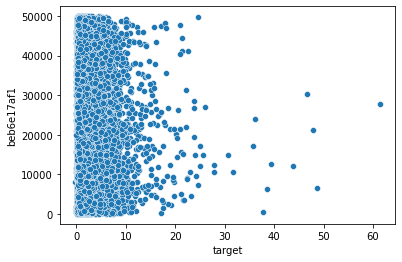

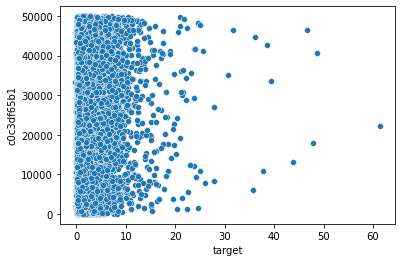

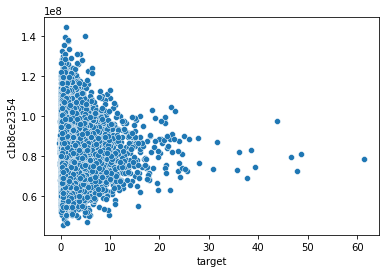

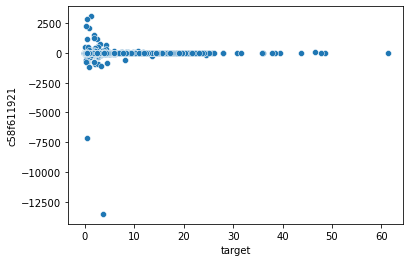

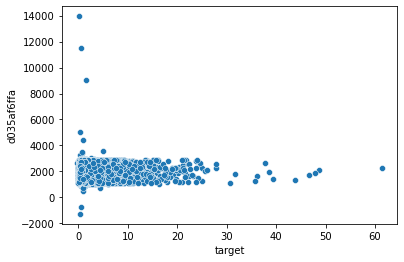

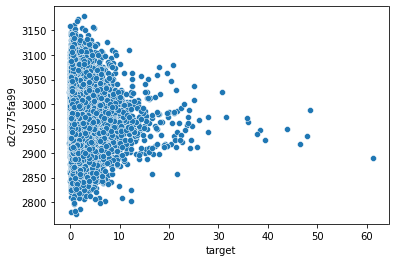

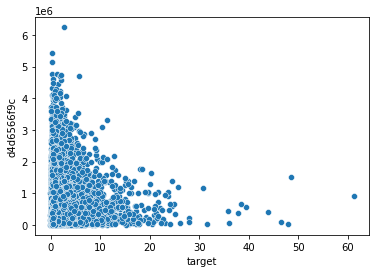

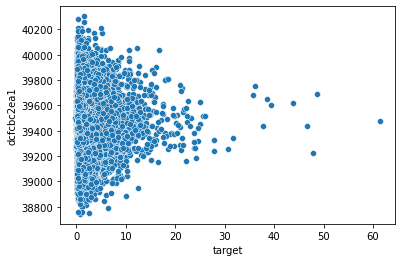

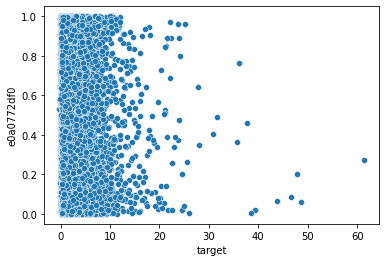

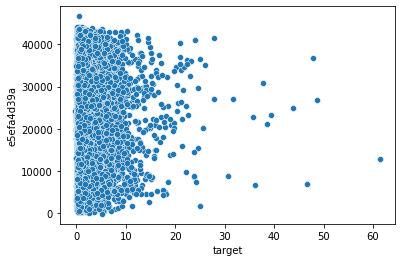

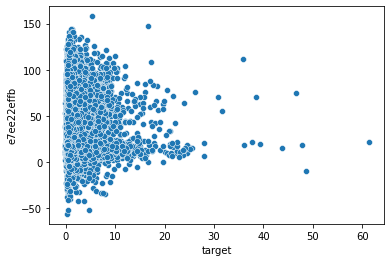

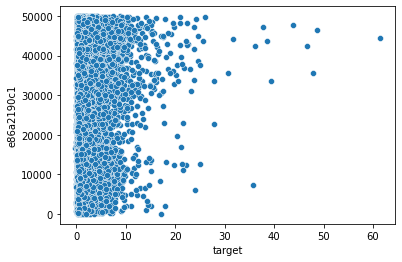

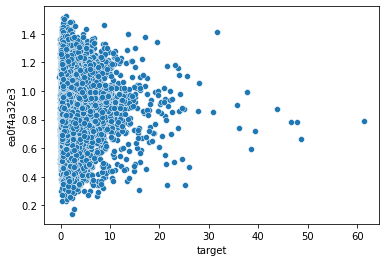

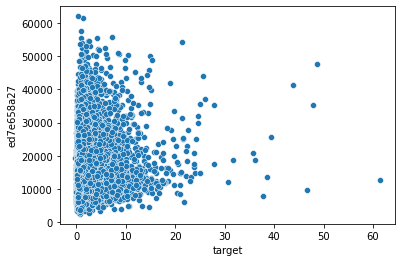

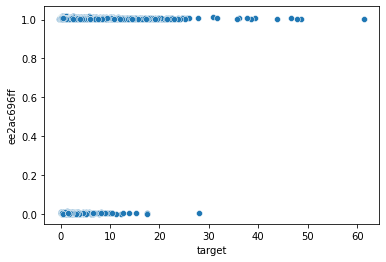

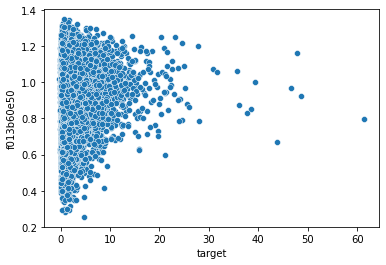

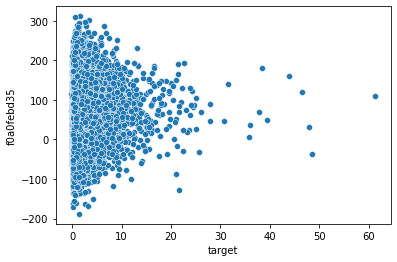

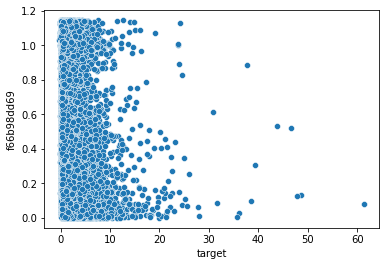

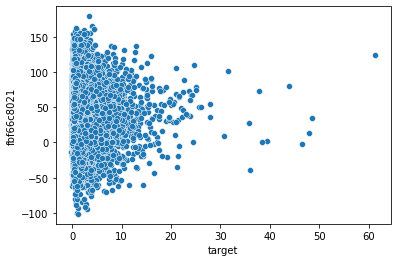

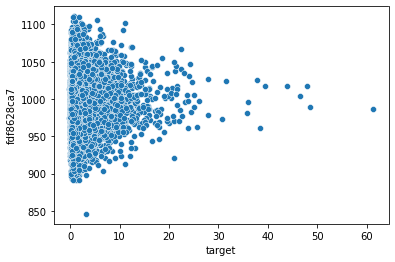

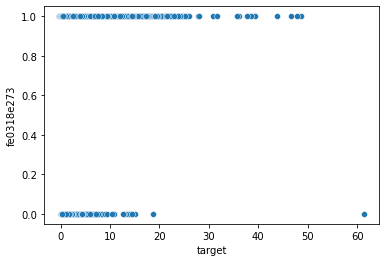

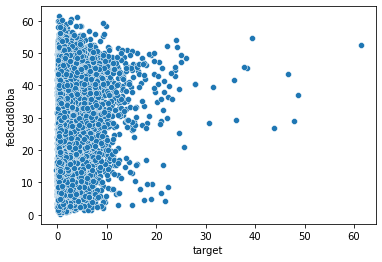

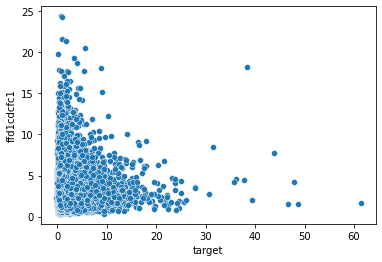

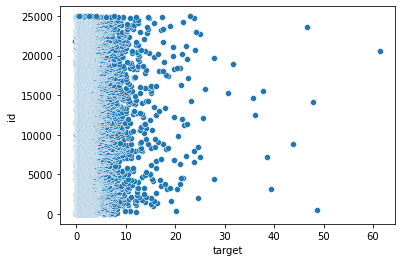

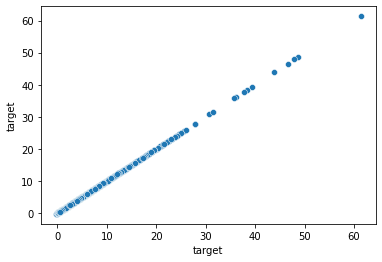

In [7]:
for coluna in df_quantitativas.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_quantitativas, x="target", y=coluna)

In [8]:
# Pude perceber que algumas variáveis quase não possuem variância então irei remove-las para que a seleção
# de variáveis comece a ficar um pouco mais simples
# from sklearn.feature_selection import VarianceThreshold
# seletor = VarianceThreshold(threshold=2)
X = df_quantitativas.drop("target", axis=1)
y = df_quantitativas["target"]

# seletor.fit(X, y)

In [9]:
# print("Shape antes: %s" % str(X.shape))
# variaveis_selecionadas = seletor.get_support()
# X = X.iloc[:, variaveis_selecionadas]
# print("Shape após a remoção das variáveis quase sem variação %s" % str(X.shape))

In [10]:
## PARTES ACIMA REMOVIDAS DO CODIGO POIS FORAM ADICIONADAS AO PIPELINE

 # Transformação dos dados
 - Nenhuma variável parece ter grande correlação com o target, para tentar solucionar esse uma transformação log pode resolver. 
 - como log de 0 tende a -inf, todas as variaveis receberão o incremento de +1, assim, não há alteração na distribuição das variáveis

In [11]:
# Temos 27 variáveis com valores negativos. Iremos remove-las, podemos perder alguma informação aqui
# Mas vale a pena o teste para verificar se é possível ajustar bem uma regressão linear
variaveis_com_valor_negativo = (X < 0).any()
print("Quantidade de variáveis com valor negativo %d" % variaveis_com_valor_negativo.sum())

Quantidade de variáveis com valor negativo 27


# Visualização das distribuições e outliers
---

In [12]:
import warnings
warnings.simplefilter("ignore")

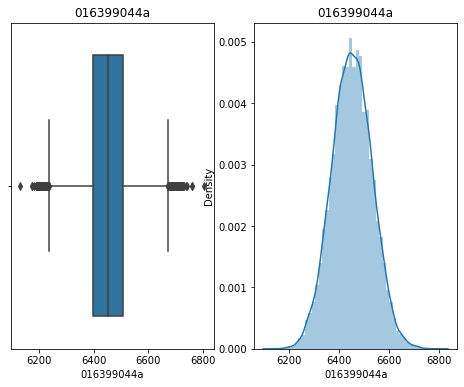

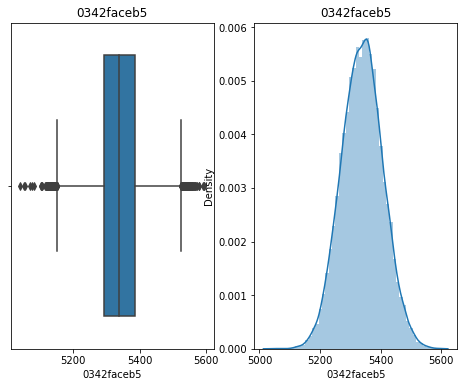

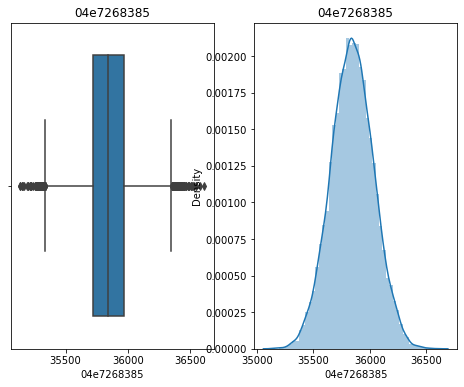

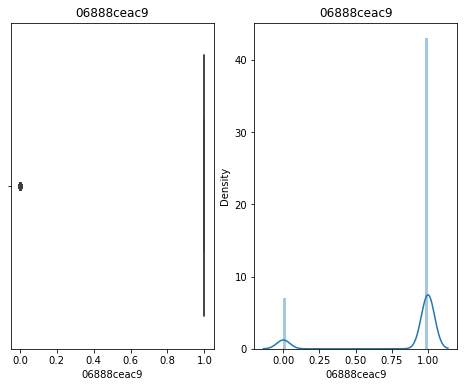

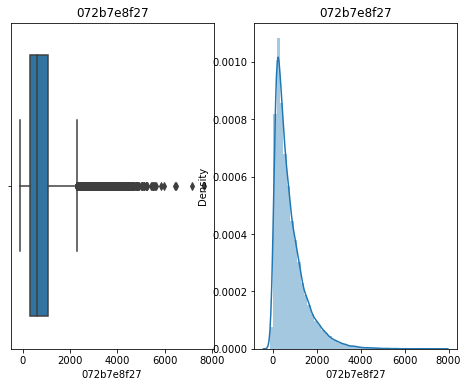

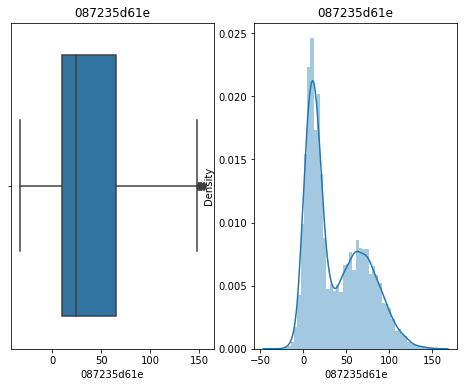

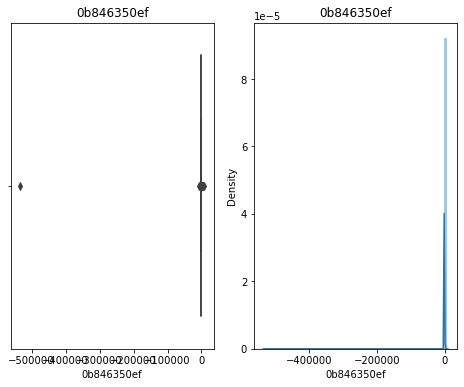

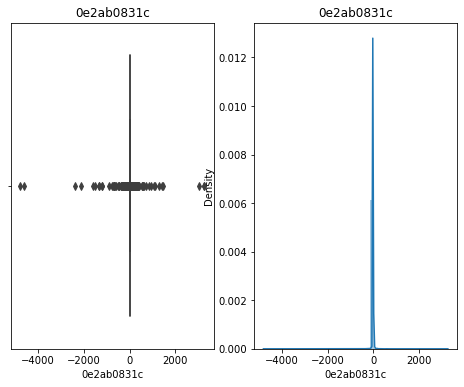

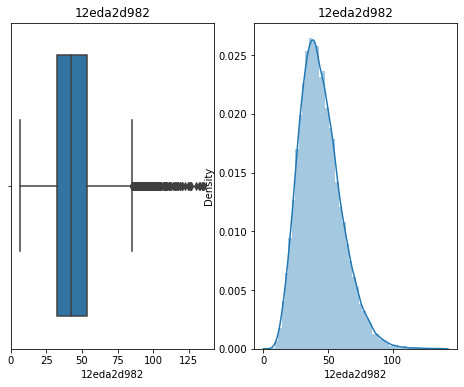

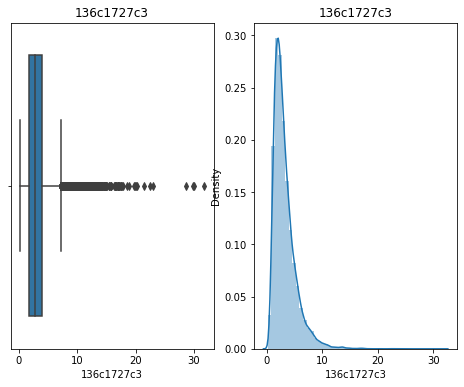

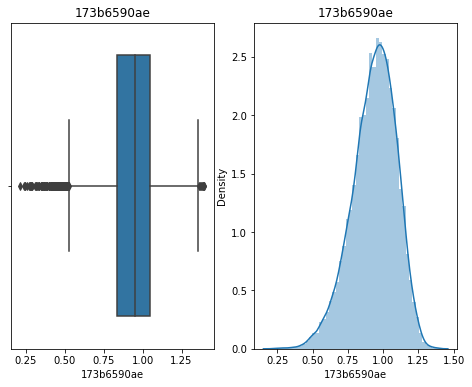

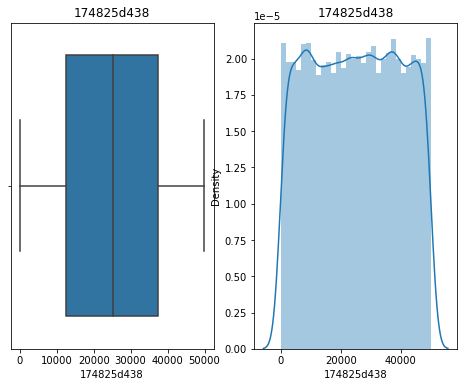

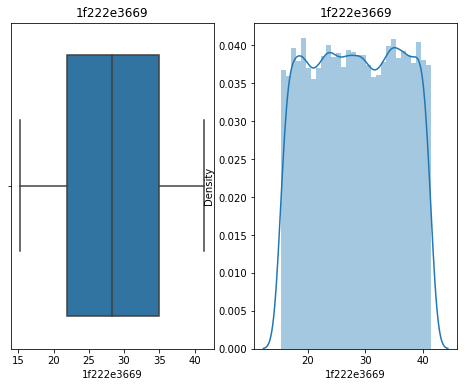

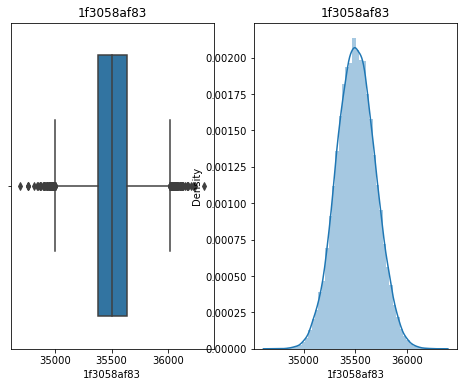

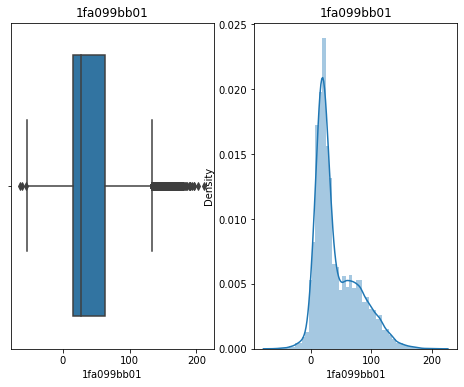

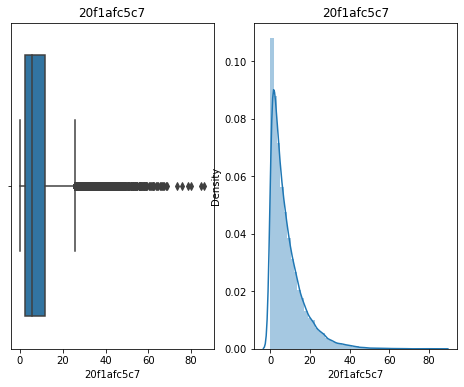

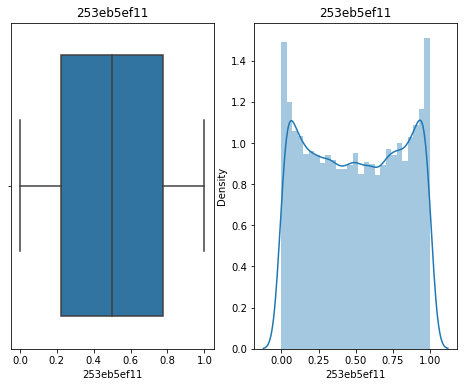

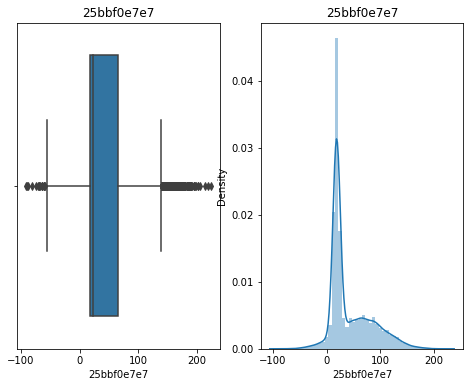

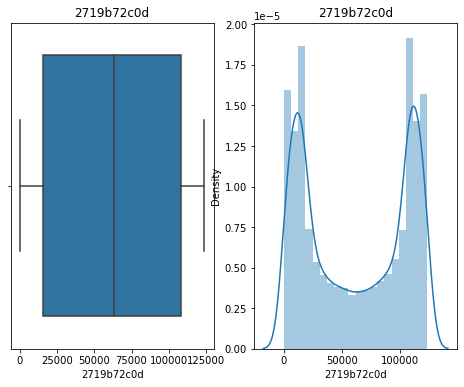

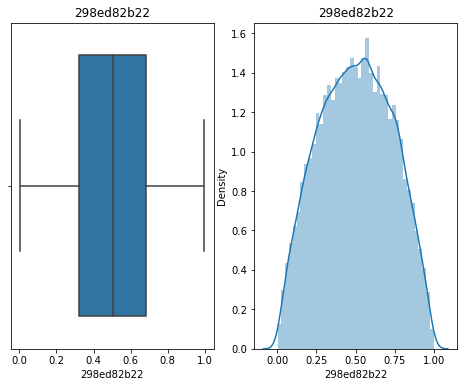

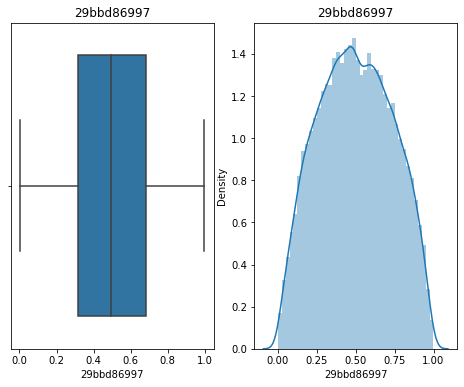

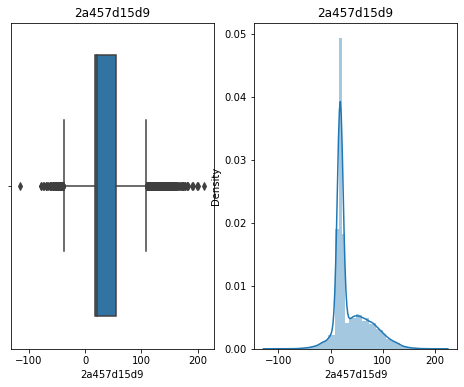

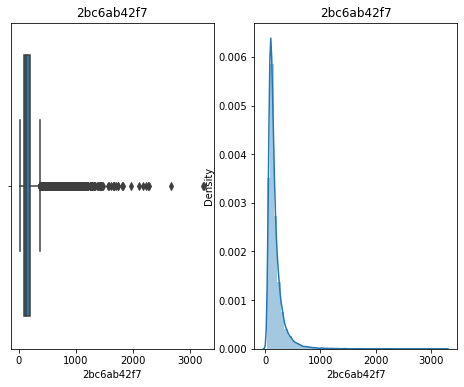

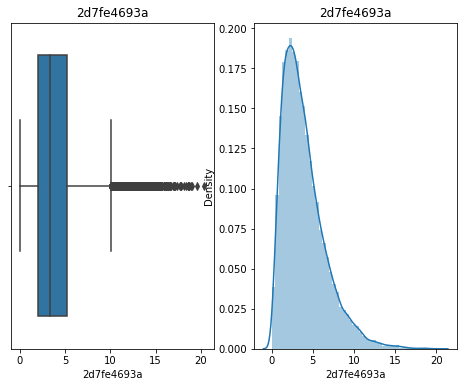

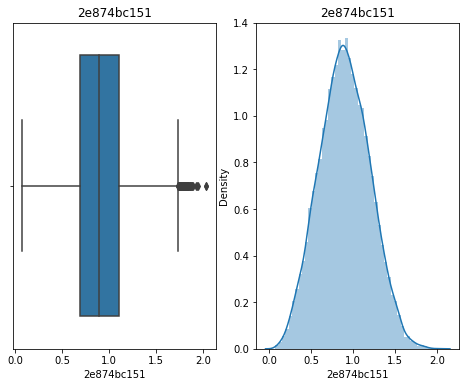

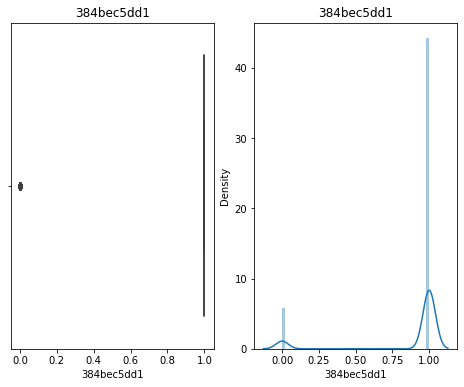

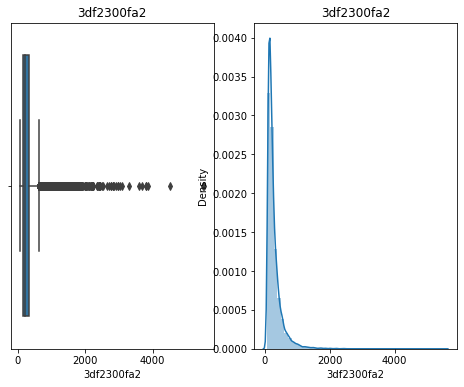

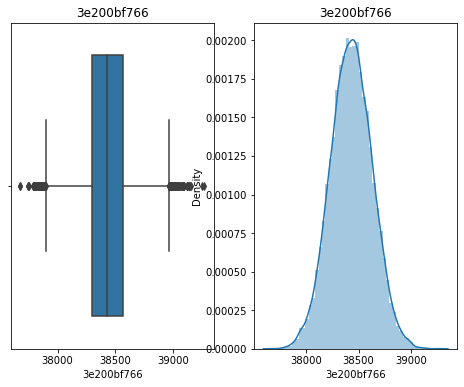

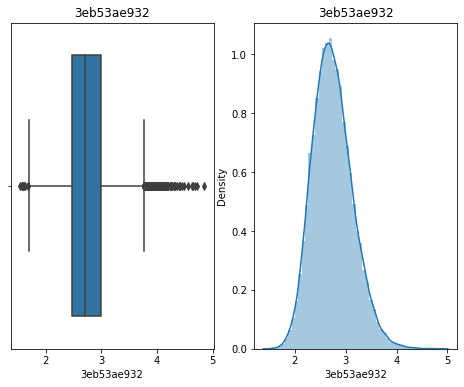

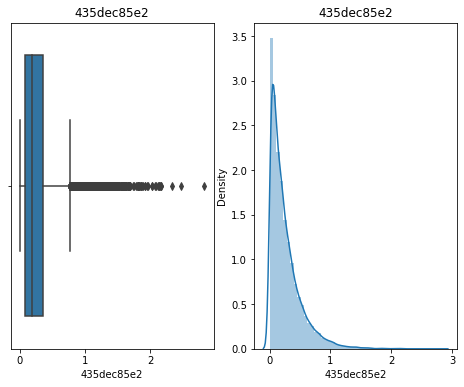

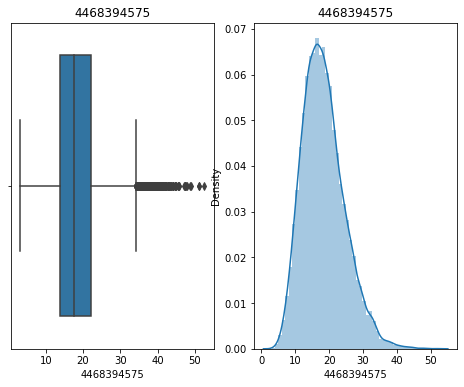

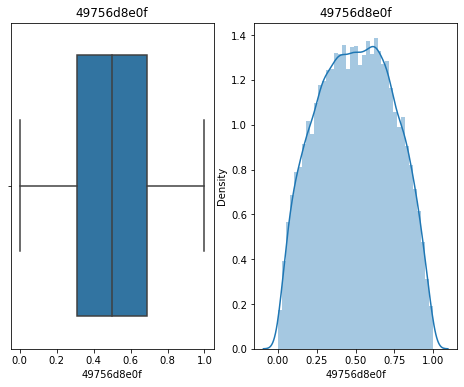

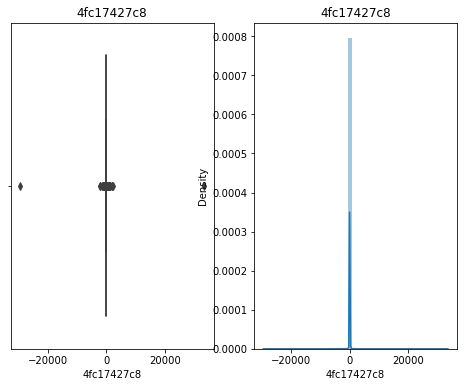

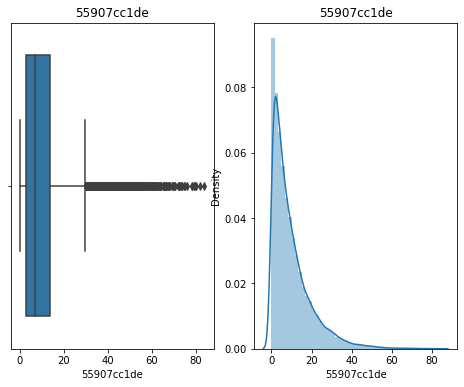

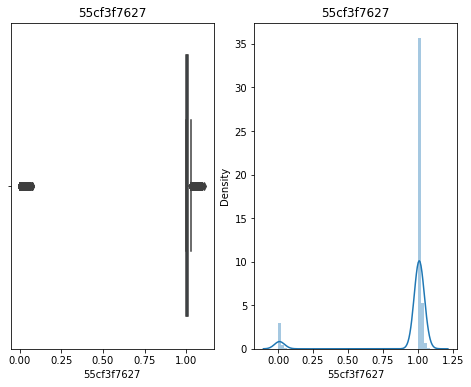

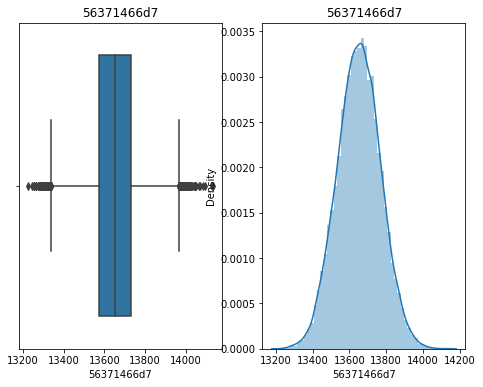

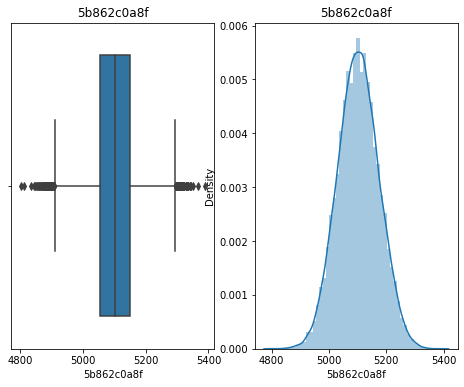

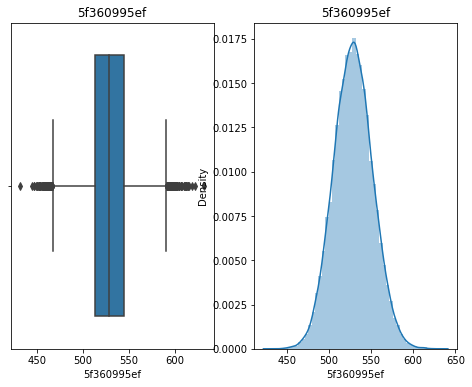

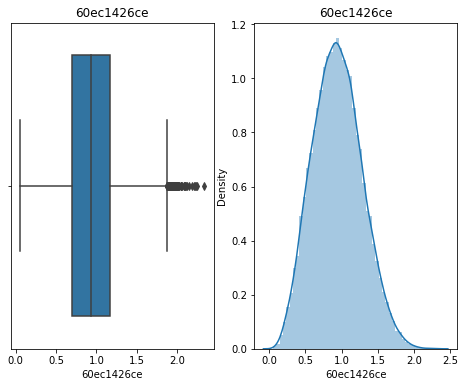

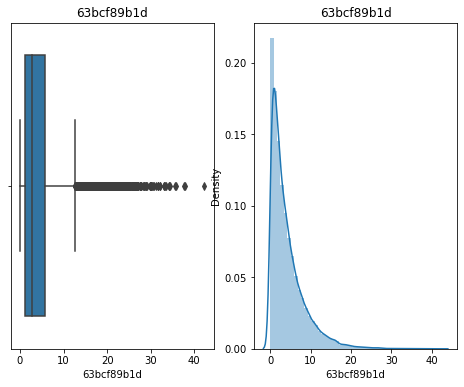

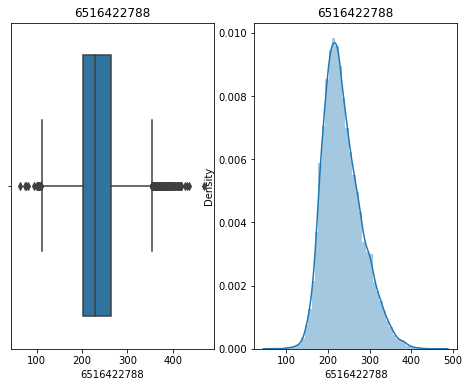

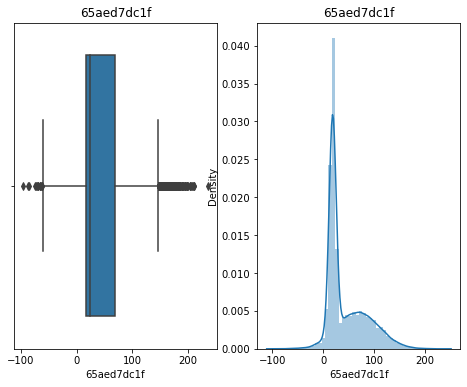

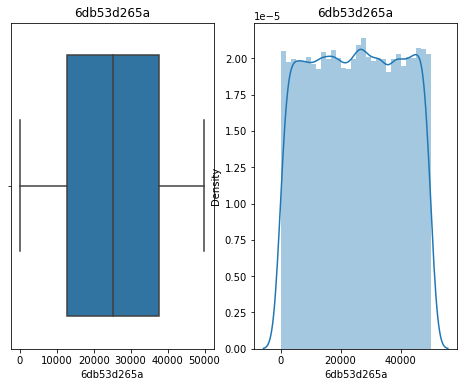

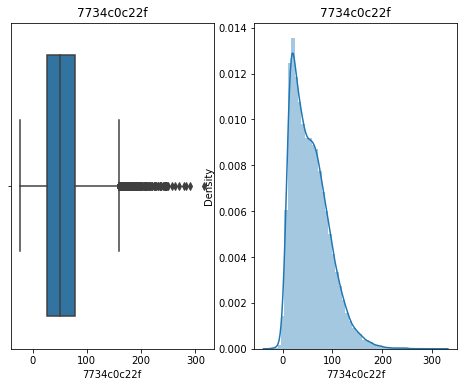

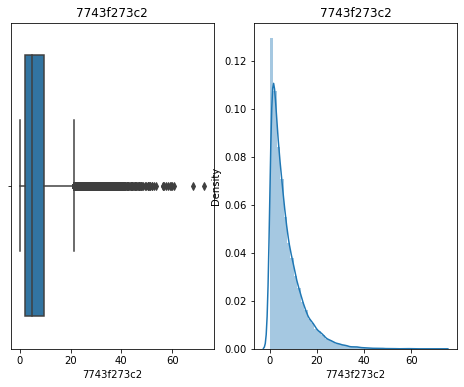

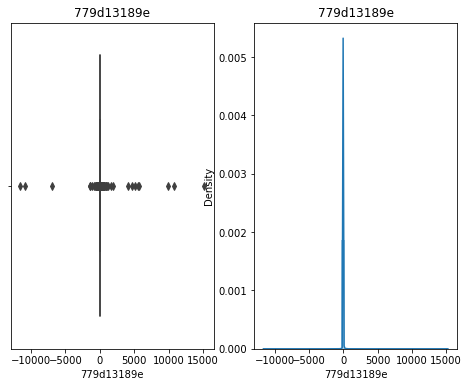

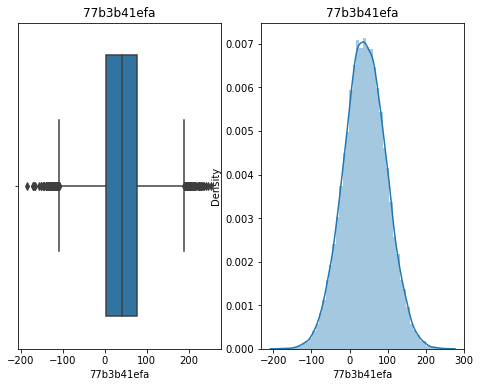

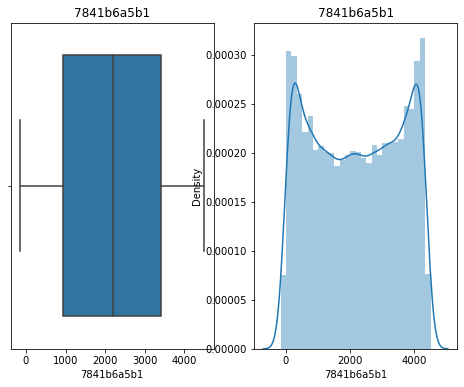

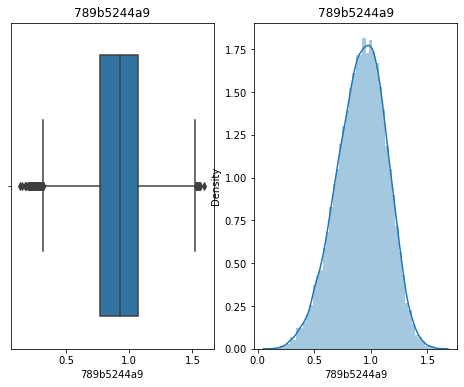

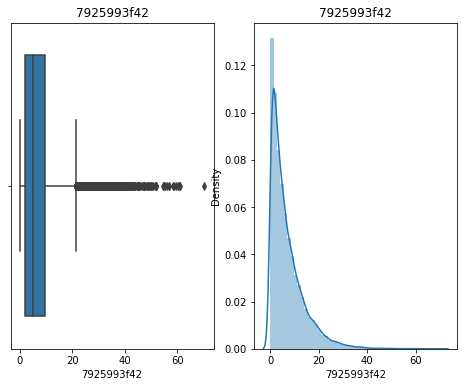

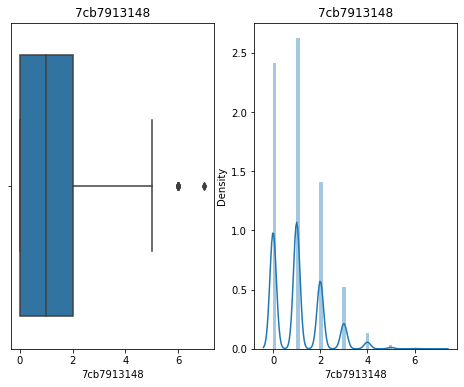

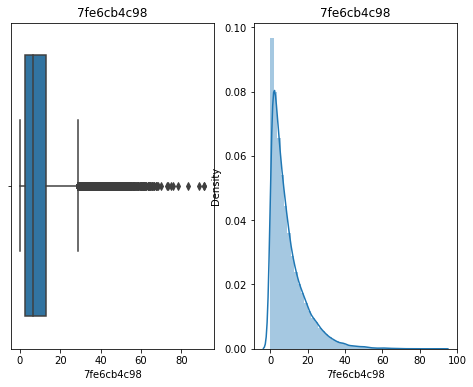

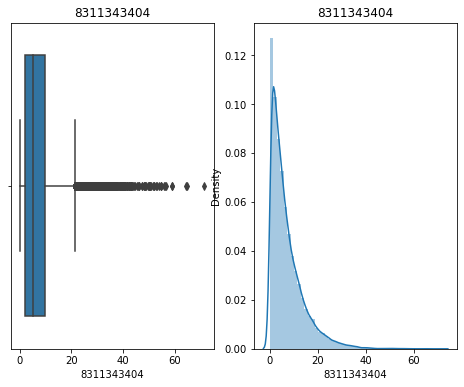

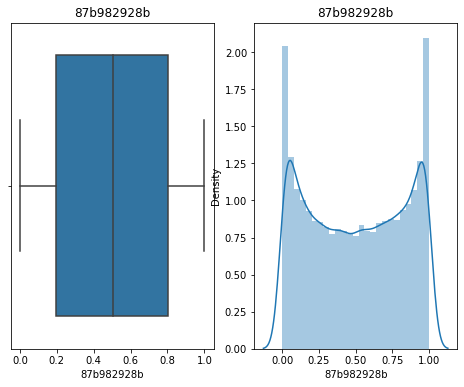

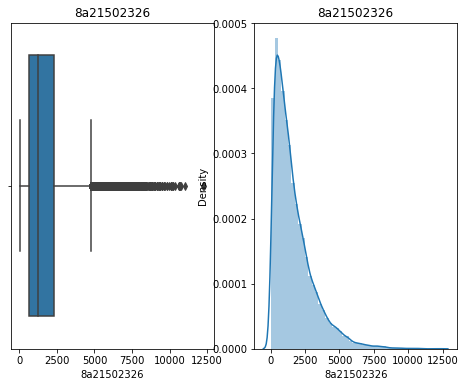

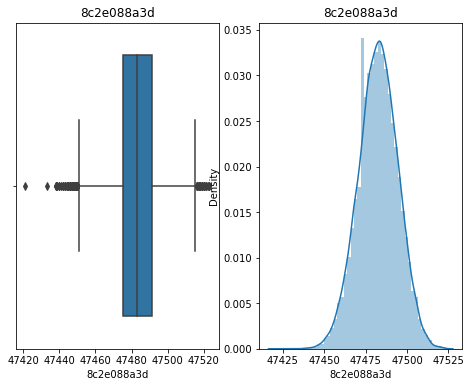

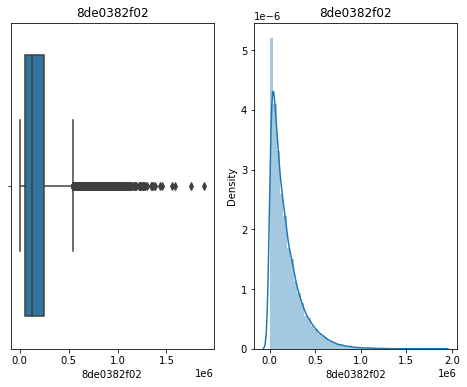

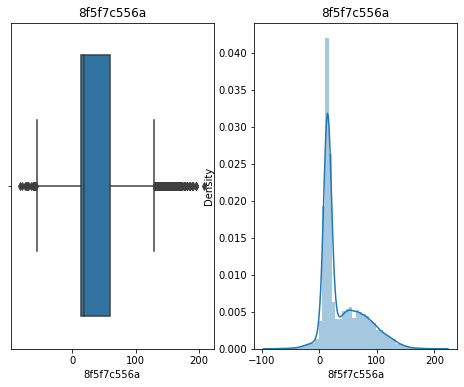

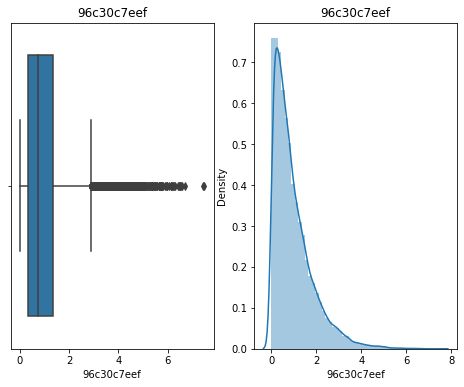

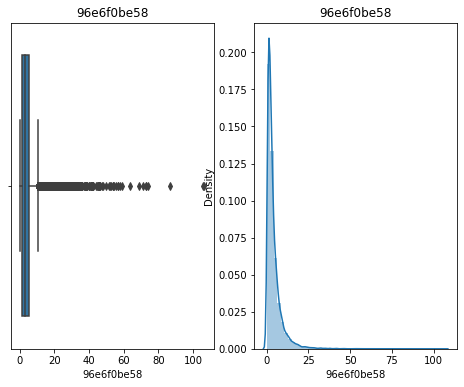

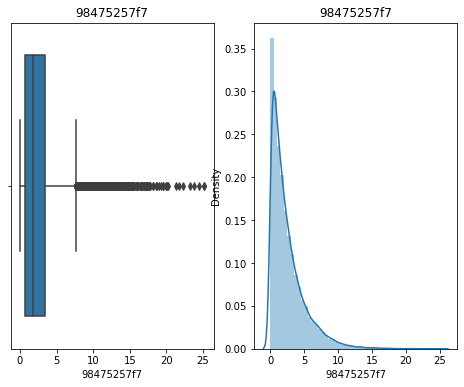

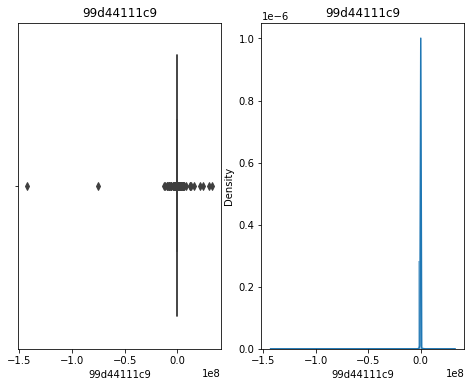

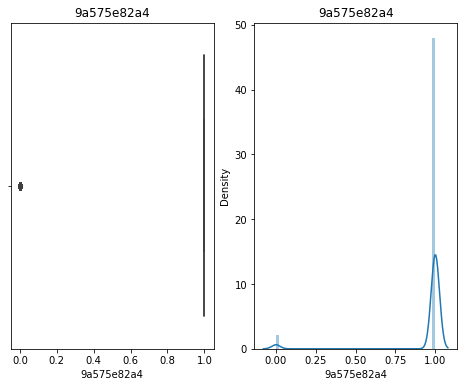

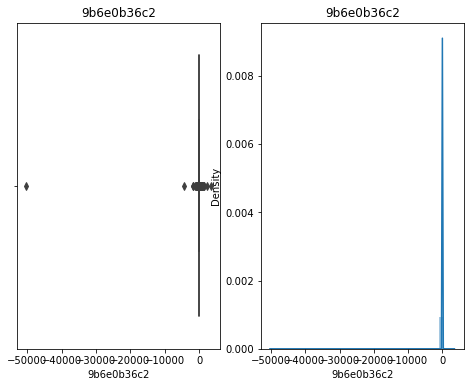

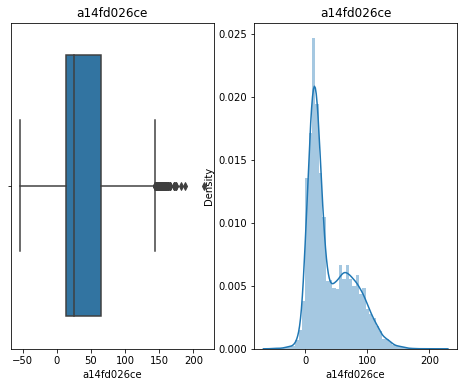

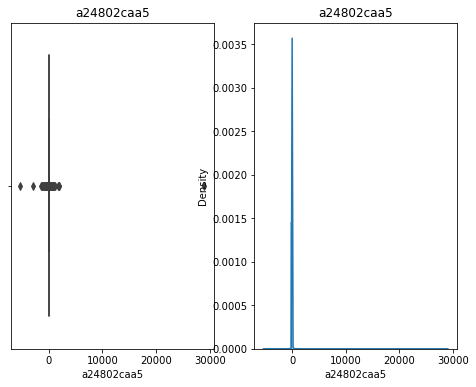

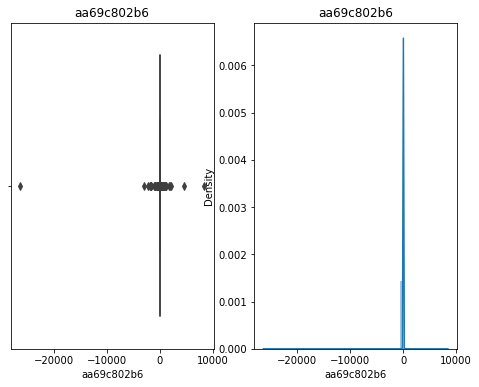

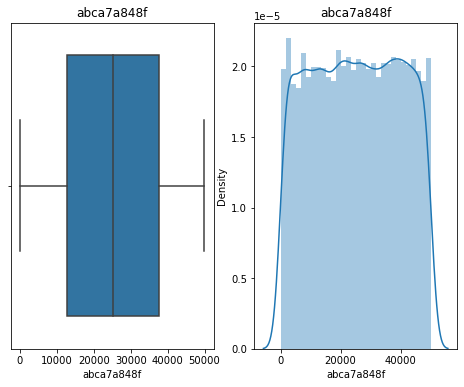

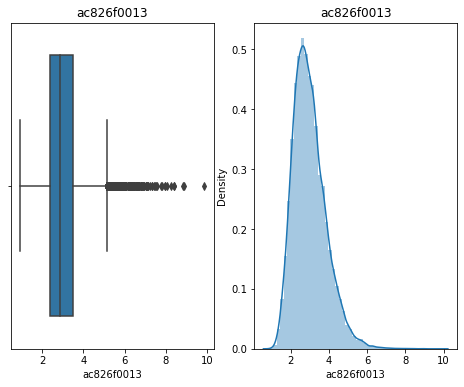

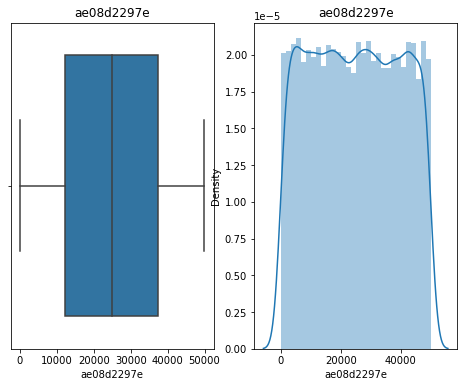

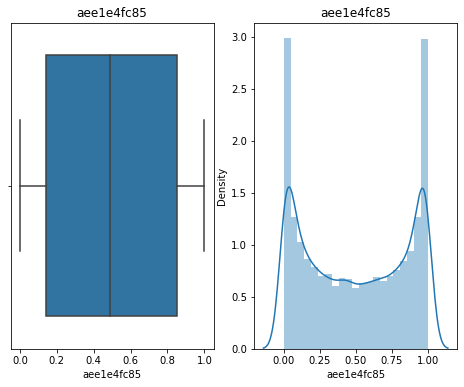

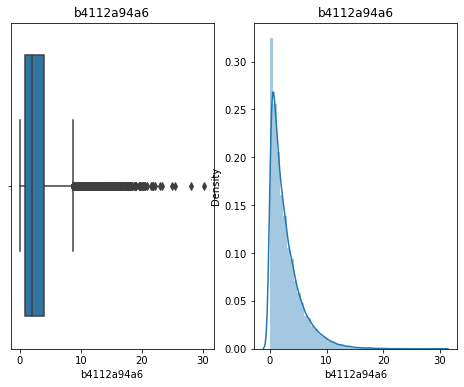

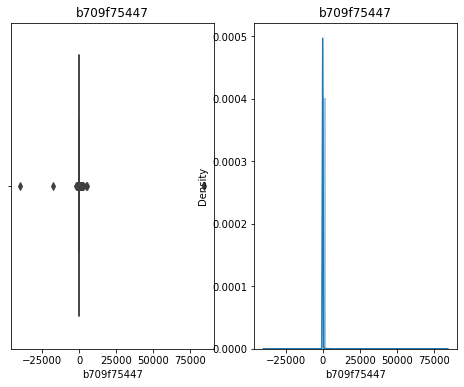

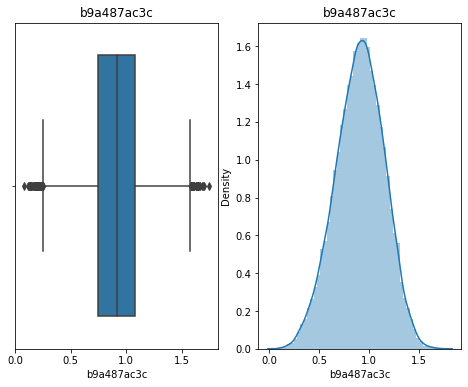

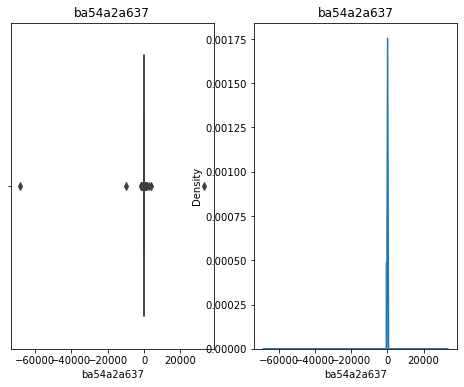

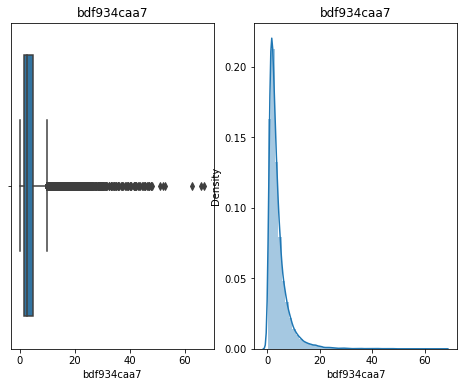

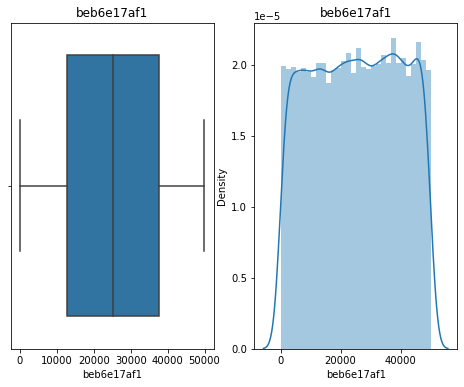

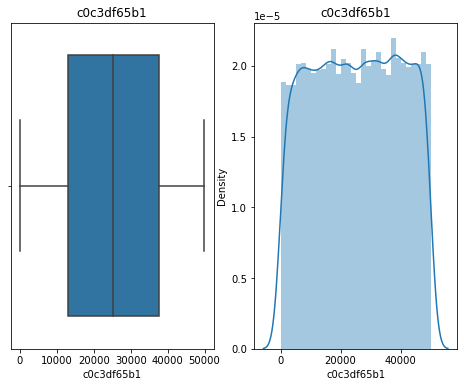

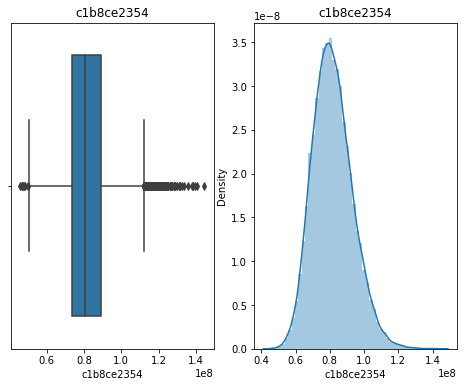

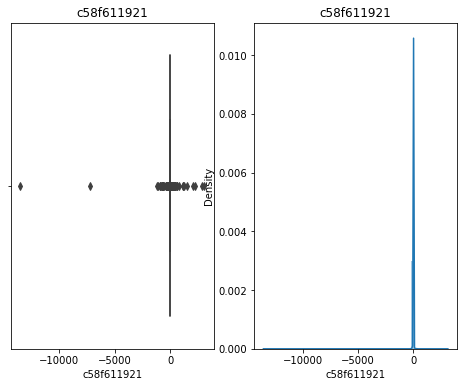

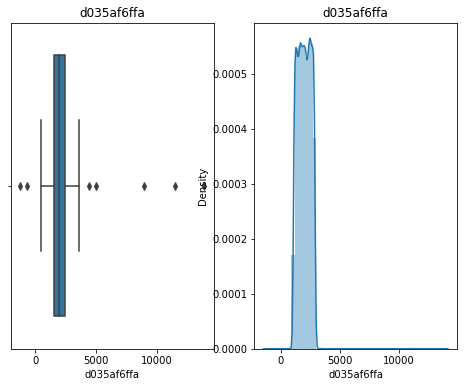

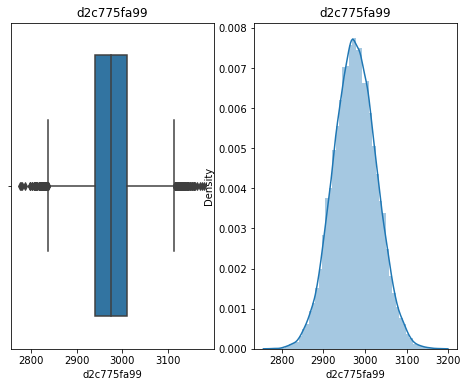

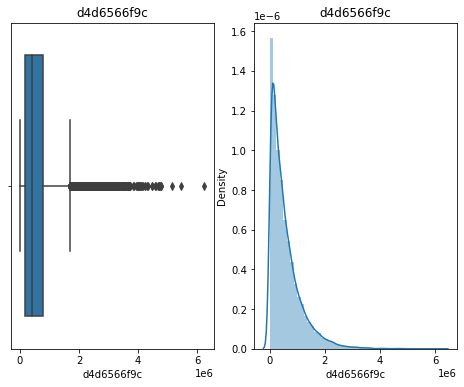

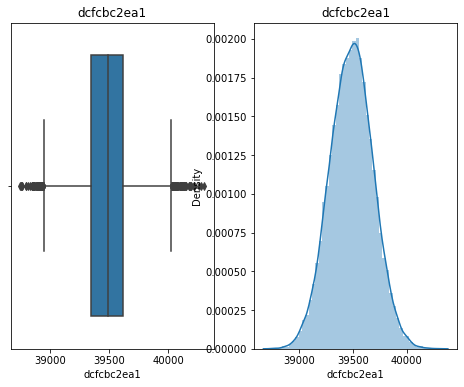

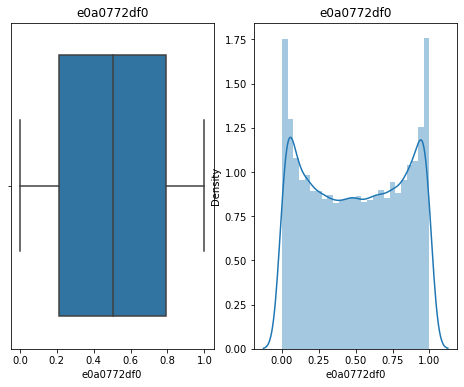

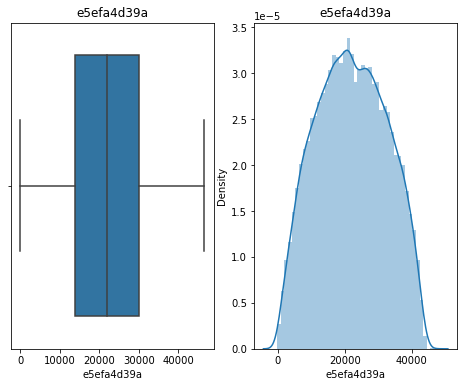

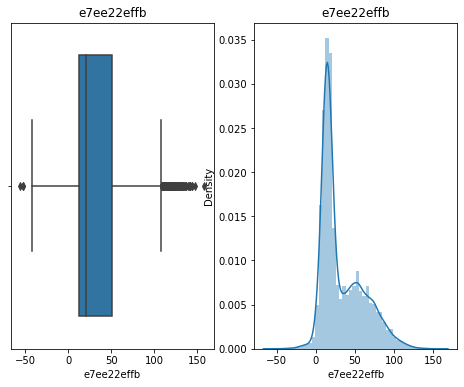

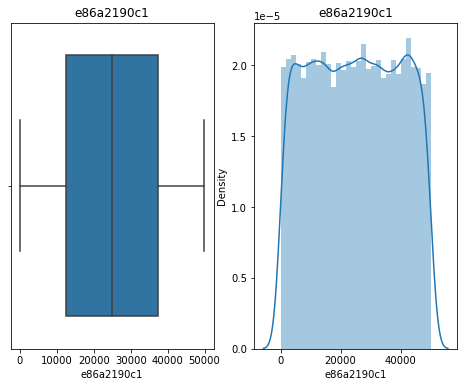

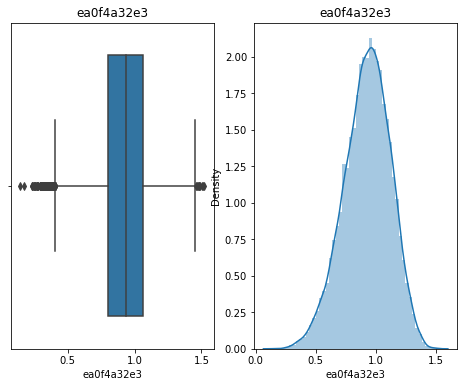

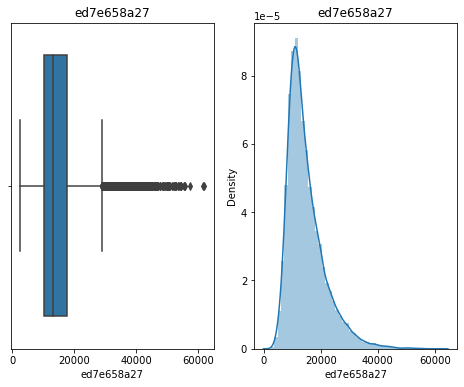

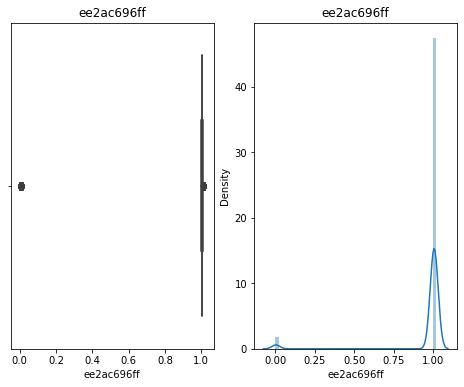

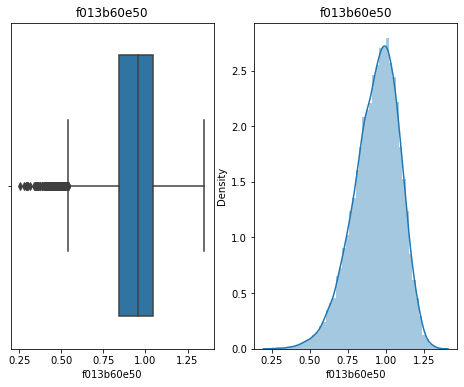

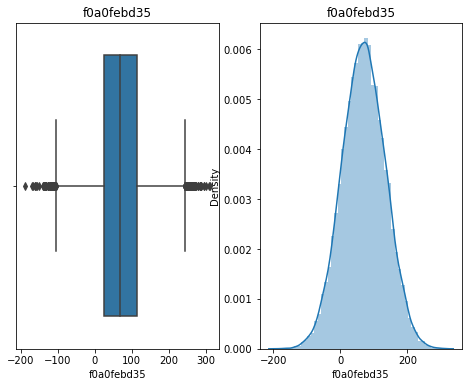

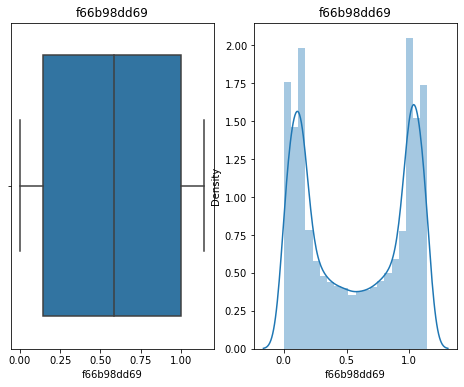

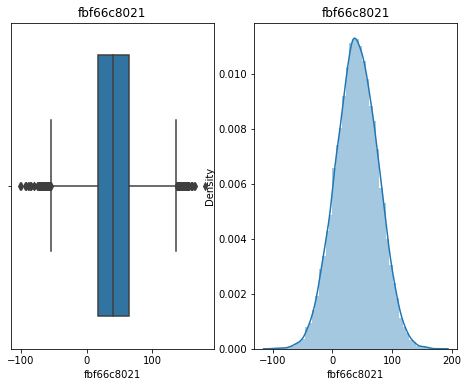

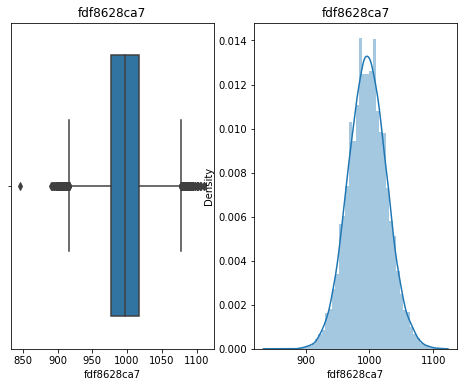

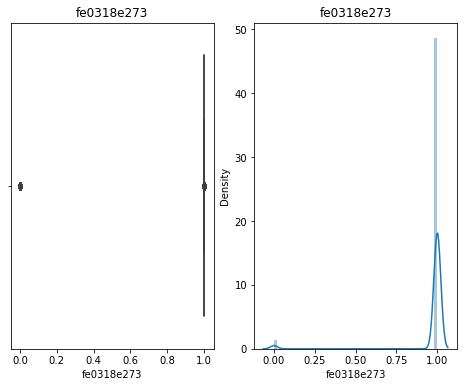

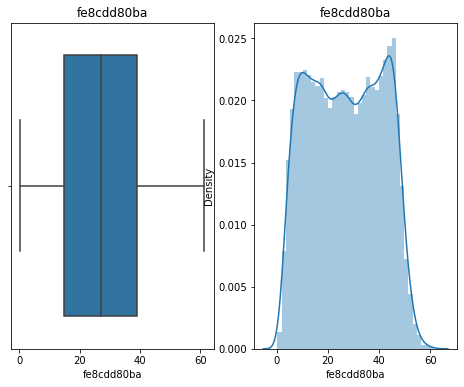

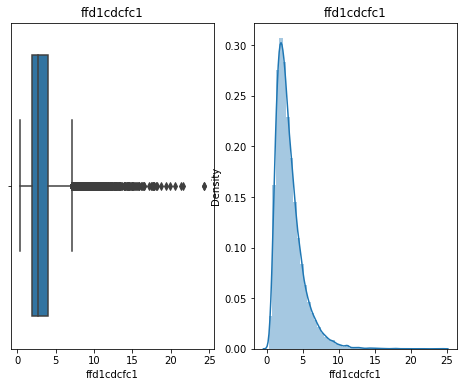

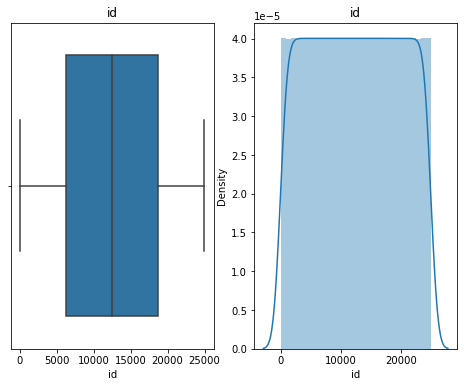

In [13]:
## Não parece ter funcionado muito bem, além disso, foram gerados muitos valores nan e inf,
# Por não sabermos a natureza dos dados, vamos partir para uma abordagem não linear
# Provavelemente o problema não é linear
# A partir disso, vamos visualizar como ficam as distribuições e "outliers" das variáveis explicativas
# Visuaizando outliers

for i, variavel in enumerate(X.columns):
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=X, x=variavel)
    plt.title(variavel)
    
    plt.subplot(1, 2, 2)
    sns.distplot(X[variavel])
    plt.title(variavel)

# Outliers
---
Como não sabemos o que há nas variáveis, não vamos arriscar remover dados por conta das variáveis Assimétricas. Então realizaremos um teste de hipótese para verificar se a variável é normal (ou próxima de uma normal) e só então removeremos os outliers. Outro ponto é não utilizar o mesmo limite do boxplot utilizaremos percentil 1 e 99 para removermos apenas os valores extremamente discrepantes (caso aja algum valor acima do limiar do boxplot)

In [14]:
from scipy.stats import normaltest

In [15]:
def remover_outliers(df):
    limites_superiores = {}
    limites_inferiores = {}
    
    for col in df.columns:
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        
        IQR = q3 - q1
        
        limite_sup = q3 + 1.5 * IQR
        limite_inf = q1 - 1.5 * IQR
        
        limites_superiores[col] = limite_sup
        limites_inferiores[col] = limite_inf
    
    return limites_superiores, limites_inferiores

limite_superior, limite_inferior = remover_outliers(X)

df = pd.concat([X, y, df_cat], axis=1)
X_sem_out = df.copy()

t = []
for var in X.columns:
    if var != "target" and X[var].dtype != "O":
        if normaltest(df[var])[1] > 0.05:
            t.append(var)
            outliers = df[(df[var] > limite_superior[var]) | (df[var] < limite_inferior[var])]
            if len(outliers) > 0:
                X_sem_out = X_sem_out[(X_sem_out[var] < df[var].quantile(.99)) &\
                                      (X_sem_out[var] > df[var].quantile(.01))]

In [16]:
df.shape

(24976, 108)

In [17]:
X_sem_out.shape

(19938, 108)

In [18]:
print("Quantidade total de variáveis com distribuição normal: %d" % len(t))

Quantidade total de variáveis com distribuição normal: 11


In [19]:
# def remover_correlacionadas(df_correlacao):
#     correlacoes_fortes_positivas = {}
#     correlacoes_fortes_negativas = {}

#     colunas_filtradas = []

#     for coluna in df_correlacao.columns:
#         colunas_filtradas.append(coluna)
#         positivos = df_correlacao[df_correlacao[coluna] >= 0.6].index
#         negativos = df_correlacao[df_correlacao[coluna] <= -0.6].index

#         for correlacao in positivos:
#             if correlacao not in colunas_filtradas:
#                 correlacoes_fortes_positivas[coluna] = correlacao

#         for correlacao in negativos:
#             if correlacao not in colunas_filtradas:
#                 correlacoes_fortes_negativas[coluna] = correlacao
        
#     return correlacoes_fortes_positivas

In [20]:
# Essas variáveis se correlacionam positivamente. Iremos removelas
# correlacoes_fortes_positivas = remover_correlacionadas(df_correlacao)

In [21]:
# X.drop(correlacoes_fortes_positivas.values(), axis=1, inplace=True)

# Feature selection automático
---

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Antes de realizar o feature selection transformarei as variaveis categóricas para numeros
def transformar_categoricas(df):
    '''
    Recebe um dataframe de variáveis categoricas e devolve um dataframe com essas variáveis transformadas
    '''
    le = LabelEncoder()
    df = df.copy()
    for var in df.columns:
        df[var] = le.fit_transform(df[var])
    
    return df

categoricas = X_sem_out.select_dtypes(include="object")
cat_transformadas = transformar_categoricas(categoricas)

In [24]:
# Trocando as categóricas pelas categóricas transformadas
X_sem_out.drop(categoricas.columns, axis=1, inplace=True)
df = pd.concat([X_sem_out, cat_transformadas], axis=1)

In [25]:
df.drop("id", axis=1, inplace=True)

In [26]:
for var in cat_transformadas.columns:
    df[var] = df[var].astype("category")

# Visualizando tipo de seletores
---

In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
oe = OrdinalEncoder()
for coluna in X.columns:
    porcent = X[coluna].nunique() / len(X)
    
    if porcent >= .9:
        categorias = pd.cut(X[coluna], bins=40, precision=0)
        categorias = categorias.values.reshape(-1, 1)
        X[coluna] = oe.fit_transform(categorias)

In [30]:
seletor = SelectKBest(score_func=mutual_info_regression, k="all")
seletor.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000018B583FB3A0>)

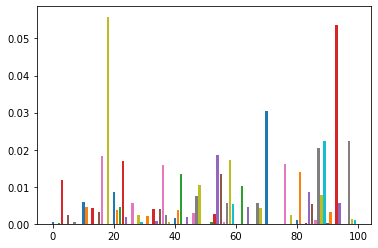

In [31]:
scores = seletor.scores_
for i in range(len(scores)):
    plt.bar(x=i, height=scores[i])

In [32]:
seletor2 = SelectKBest(score_func=f_regression, k="all")
seletor2.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000018B72B9CE50>)

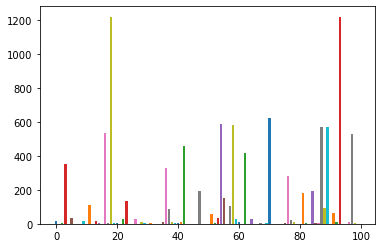

In [33]:
scores2 = seletor2.scores_
for i in range(len(scores2)):
    plt.bar(x=i, height=scores2[i])

## Optamos por utilizar o segundo seletor
---

# Definindo modelo - regressão linear
---

In [34]:
X_v2 = pd.DataFrame(X)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_v2, y, test_size=0.2, random_state=42)

In [37]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)
preds_treino = modelo.predict(X_train)
preds_teste = modelo.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

print("R² treino: %f" % r2_score(y_train, preds_treino))
print("R² teste: %f" % r2_score(y_test, preds_teste))


R² treino: 0.266512
R² teste: 0.254846


### Após esse resultado bem ruim, iremos utilizar um modelo não linear

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectFromModel

import time

In [ ]:
espaco_parametros = {
    "n_estimators": randint(10, 351),
    "criterion": ["mse"],
    "max_depth": randint(2, 9),
    "min_samples_split": randint(6, 20),
    "min_samples_leaf": randint(1, 31),
    "max_features": [None, 1.0],
    "max_leaf_nodes": randint(3, 25),
    "bootstrap": [True, False]
}

tempo_inicio = time.time()
busca = RandomizedSearchCV(RandomForestRegressor(), espaco_parametros, 
                           scoring="r2", random_state=32, verbose=3,
                           n_iter=230, cv=KFold(n_splits=5, shuffle=True))

busca.fit(X_train, y_train)
tempo_fim = time.time()

Fitting 5 folds for each of 230 candidates, totalling 1150 fits
[CV 1/5] END bootstrap=False, criterion=mse, max_depth=5, max_features=1.0, max_leaf_nodes=22, min_samples_leaf=29, min_samples_split=13, n_estimators=99;, score=0.097 total time=  32.2s
[CV 2/5] END bootstrap=False, criterion=mse, max_depth=5, max_features=1.0, max_leaf_nodes=22, min_samples_leaf=29, min_samples_split=13, n_estimators=99;, score=0.104 total time=  31.8s
[CV 3/5] END bootstrap=False, criterion=mse, max_depth=5, max_features=1.0, max_leaf_nodes=22, min_samples_leaf=29, min_samples_split=13, n_estimators=99;, score=0.114 total time=  27.0s
[CV 4/5] END bootstrap=False, criterion=mse, max_depth=5, max_features=1.0, max_leaf_nodes=22, min_samples_leaf=29, min_samples_split=13, n_estimators=99;, score=0.129 total time=  29.3s
[CV 5/5] END bootstrap=False, criterion=mse, max_depth=5, max_features=1.0, max_leaf_nodes=22, min_samples_leaf=29, min_samples_split=13, n_estimators=99;, score=0.104 total time=  26.3s
[

[CV 5/5] END bootstrap=False, criterion=mse, max_depth=4, max_features=None, max_leaf_nodes=12, min_samples_leaf=12, min_samples_split=7, n_estimators=78;, score=0.094 total time=  17.0s
[CV 1/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=17, n_estimators=260;, score=0.088 total time=  19.6s
[CV 2/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=17, n_estimators=260;, score=0.098 total time=  19.6s
[CV 3/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=17, n_estimators=260;, score=0.076 total time=  19.6s
[CV 4/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=17, n_estimators=260;, score=0.086 total time=  19.9s
[CV 5/5] END bootstrap=True, criterion=mse, max_depth=2, max_

[CV 4/5] END bootstrap=True, criterion=mse, max_depth=5, max_features=None, max_leaf_nodes=23, min_samples_leaf=9, min_samples_split=8, n_estimators=146;, score=0.168 total time=  27.9s
[CV 5/5] END bootstrap=True, criterion=mse, max_depth=5, max_features=None, max_leaf_nodes=23, min_samples_leaf=9, min_samples_split=8, n_estimators=146;, score=0.160 total time=  27.7s
[CV 1/5] END bootstrap=False, criterion=mse, max_depth=6, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=6, n_estimators=53;, score=0.099 total time=  16.4s
[CV 2/5] END bootstrap=False, criterion=mse, max_depth=6, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=6, n_estimators=53;, score=0.075 total time=  15.5s
[CV 3/5] END bootstrap=False, criterion=mse, max_depth=6, max_features=None, max_leaf_nodes=21, min_samples_leaf=18, min_samples_split=6, n_estimators=53;, score=0.093 total time=  15.4s
[CV 4/5] END bootstrap=False, criterion=mse, max_depth=6, max_featu

[CV 3/5] END bootstrap=False, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=11, min_samples_leaf=21, min_samples_split=18, n_estimators=302;, score=0.090 total time=  52.9s
[CV 4/5] END bootstrap=False, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=11, min_samples_leaf=21, min_samples_split=18, n_estimators=302;, score=0.100 total time=  52.2s
[CV 5/5] END bootstrap=False, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=11, min_samples_leaf=21, min_samples_split=18, n_estimators=302;, score=0.086 total time=  53.0s
[CV 1/5] END bootstrap=True, criterion=mse, max_depth=8, max_features=1.0, max_leaf_nodes=13, min_samples_leaf=2, min_samples_split=15, n_estimators=239;, score=0.115 total time=  38.1s
[CV 2/5] END bootstrap=True, criterion=mse, max_depth=8, max_features=1.0, max_leaf_nodes=13, min_samples_leaf=2, min_samples_split=15, n_estimators=239;, score=0.140 total time=  38.3s
[CV 3/5] END bootstrap=True, criterion=mse, max_depth=8, max_

[CV 2/5] END bootstrap=False, criterion=mse, max_depth=4, max_features=1.0, max_leaf_nodes=11, min_samples_leaf=30, min_samples_split=13, n_estimators=195;, score=0.106 total time=  42.1s
[CV 3/5] END bootstrap=False, criterion=mse, max_depth=4, max_features=1.0, max_leaf_nodes=11, min_samples_leaf=30, min_samples_split=13, n_estimators=195;, score=0.096 total time=  42.8s
[CV 4/5] END bootstrap=False, criterion=mse, max_depth=4, max_features=1.0, max_leaf_nodes=11, min_samples_leaf=30, min_samples_split=13, n_estimators=195;, score=0.112 total time=  41.8s
[CV 5/5] END bootstrap=False, criterion=mse, max_depth=4, max_features=1.0, max_leaf_nodes=11, min_samples_leaf=30, min_samples_split=13, n_estimators=195;, score=0.093 total time=  42.2s
[CV 1/5] END bootstrap=True, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=3, min_samples_leaf=9, min_samples_split=17, n_estimators=271;, score=0.077 total time=  26.8s
[CV 2/5] END bootstrap=True, criterion=mse, max_depth=3, max_f

[CV 1/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=10, n_estimators=152;, score=0.086 total time=  11.4s
[CV 2/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=10, n_estimators=152;, score=0.098 total time=  11.3s
[CV 3/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=10, n_estimators=152;, score=0.076 total time=  11.6s
[CV 4/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=10, n_estimators=152;, score=0.087 total time=  11.4s
[CV 5/5] END bootstrap=True, criterion=mse, max_depth=2, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=10, n_estimators=152;, score=0.078 total time=  11.4s
[CV 1/5] END bootstrap=False, criterion=mse, max_depth=3, max_fea

[CV 5/5] END bootstrap=True, criterion=mse, max_depth=5, max_features=None, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=85;, score=0.154 total time=  17.0s
[CV 1/5] END bootstrap=True, criterion=mse, max_depth=7, max_features=None, max_leaf_nodes=21, min_samples_leaf=12, min_samples_split=16, n_estimators=160;, score=0.163 total time=  30.7s
[CV 2/5] END bootstrap=True, criterion=mse, max_depth=7, max_features=None, max_leaf_nodes=21, min_samples_leaf=12, min_samples_split=16, n_estimators=160;, score=0.180 total time=  30.6s
[CV 3/5] END bootstrap=True, criterion=mse, max_depth=7, max_features=None, max_leaf_nodes=21, min_samples_leaf=12, min_samples_split=16, n_estimators=160;, score=0.164 total time=  29.8s
[CV 4/5] END bootstrap=True, criterion=mse, max_depth=7, max_features=None, max_leaf_nodes=21, min_samples_leaf=12, min_samples_split=16, n_estimators=160;, score=0.173 total time=  30.5s
[CV 5/5] END bootstrap=True, criterion=mse, max_depth=7, max_f

[CV 4/5] END bootstrap=True, criterion=mse, max_depth=7, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=5, min_samples_split=8, n_estimators=339;, score=0.166 total time= 1.1min
[CV 5/5] END bootstrap=True, criterion=mse, max_depth=7, max_features=1.0, max_leaf_nodes=24, min_samples_leaf=5, min_samples_split=8, n_estimators=339;, score=0.165 total time= 1.1min
[CV 1/5] END bootstrap=False, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=14, n_estimators=300;, score=0.090 total time=  51.9s
[CV 2/5] END bootstrap=False, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=14, n_estimators=300;, score=0.107 total time=  52.3s
[CV 3/5] END bootstrap=False, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=14, n_estimators=300;, score=0.090 total time=  51.9s
[CV 4/5] END bootstrap=False, criterion=mse, max_depth=3, max_feat

[CV 3/5] END bootstrap=True, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=21, min_samples_leaf=2, min_samples_split=13, n_estimators=278;, score=0.102 total time=  31.7s
[CV 4/5] END bootstrap=True, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=21, min_samples_leaf=2, min_samples_split=13, n_estimators=278;, score=0.107 total time=  31.3s
[CV 5/5] END bootstrap=True, criterion=mse, max_depth=3, max_features=None, max_leaf_nodes=21, min_samples_leaf=2, min_samples_split=13, n_estimators=278;, score=0.099 total time=  31.4s
[CV 1/5] END bootstrap=False, criterion=mse, max_depth=7, max_features=None, max_leaf_nodes=13, min_samples_leaf=28, min_samples_split=7, n_estimators=279;, score=0.094 total time= 1.2min
[CV 2/5] END bootstrap=False, criterion=mse, max_depth=7, max_features=None, max_leaf_nodes=13, min_samples_leaf=28, min_samples_split=7, n_estimators=279;, score=0.077 total time= 1.1min
[CV 3/5] END bootstrap=False, criterion=mse, max_depth=7, max_f

[CV 2/5] END bootstrap=False, criterion=mse, max_depth=8, max_features=None, max_leaf_nodes=16, min_samples_leaf=17, min_samples_split=9, n_estimators=13;, score=0.082 total time=   3.3s
[CV 3/5] END bootstrap=False, criterion=mse, max_depth=8, max_features=None, max_leaf_nodes=16, min_samples_leaf=17, min_samples_split=9, n_estimators=13;, score=0.112 total time=   3.6s
[CV 4/5] END bootstrap=False, criterion=mse, max_depth=8, max_features=None, max_leaf_nodes=16, min_samples_leaf=17, min_samples_split=9, n_estimators=13;, score=0.143 total time=   3.2s
[CV 5/5] END bootstrap=False, criterion=mse, max_depth=8, max_features=None, max_leaf_nodes=16, min_samples_leaf=17, min_samples_split=9, n_estimators=13;, score=0.102 total time=   3.4s
[CV 1/5] END bootstrap=False, criterion=mse, max_depth=4, max_features=None, max_leaf_nodes=12, min_samples_leaf=3, min_samples_split=11, n_estimators=182;, score=0.084 total time=  42.2s
[CV 2/5] END bootstrap=False, criterion=mse, max_depth=4, max_fe

In [ ]:
resultados = pd.DataFrame(busca.cv_results_)
resultados.sort_values("rank_test_score").head()

In [ ]:
melhor_modelo = busca.best_estimator_

predicao_treino = melhor_modelo.predict(X_train)
predicao_teste = melhor_modelo.predict(X_test)

print("Resultado treino: %f" % r2_score(y_train, predicao_treino))
print("Resultado teste: %f" % r2_score(y_test, predicao_teste))

## Como nenhuma das duas soluções foram ótimas, optamos por utilizar a regressão linear que tem menos overfit

In [ ]:
if "id" in df_quantitativas.columns:
    df_quantitativas.drop("id", axis=1, inplace=True)

In [ ]:
limite_superior, limite_inferior = remover_outliers(df_quantitativas)

df = pd.concat([df_quantitativas, df_cat], axis=1)
X_sem_out = df.copy()

t = []
for var in df.columns:
    if var != "target" and df[var].dtype != "O":
        if normaltest(df[var])[1] > 0.05:
            t.append(var)
            outliers = df[(df[var] > limite_superior[var]) | (df[var] < limite_inferior[var])]
            if len(outliers) > 0:
                X_sem_out = X_sem_out[(X_sem_out[var] < df[var].quantile(.99)) &\
                                      (X_sem_out[var] > df[var].quantile(.01))]

In [ ]:
df_cat = X_sem_out.select_dtypes("object")
cat_transformadas = transformar_categoricas(df_cat)
cat_transformadas

In [ ]:
for var in cat_transformadas.columns:
    cat_transformadas[var] = cat_transformadas[var].astype("category")

In [ ]:
X_sem_out.drop(cat_transformadas.columns, axis=1, inplace=True)
df = pd.concat([X_sem_out, cat_transformadas], axis=1)
df.shape

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Categorizando variáveis
oe = OrdinalEncoder()
for coluna in df.columns:
    porcent = df[coluna].nunique() / len(X)
    
    if porcent >= .9:
        categorias = pd.cut(df[coluna], bins=40, precision=0)
        categorias = categorias.values.reshape(-1, 1)
        df[coluna] = oe.fit_transform(categorias)

In [ ]:
df.shape

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
modelo = Pipeline([
    ("feature_selection1", VarianceThreshold(threshold=2)),
    ("feature_selection2", SelectKBest(score_func=f_regression, k=30)),
    ("modelo", LinearRegression())
])

modelo

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo.fit(X_train, y_train)
preds_treino = modelo.predict(X_train)
preds_teste = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print("R² treino: %f" % r2_score(y_train, preds_treino))
print("R² teste: %f" % r2_score(y_test, preds_teste))


## Gerando resultados de teste
---

In [ ]:
df_teste = pd.read_csv("test.csv")
df_teste.drop("id", axis=1, inplace=True)
df_teste.head()

In [ ]:
teste_categoricas = df_teste.select_dtypes(include="object")
teste_quantitativas = df_teste.drop(teste_categoricas.columns, axis=1)

In [ ]:
# Trocando as categóricas pelas categóricas transformadas
cat_transformadas_teste = transformar_categoricas(teste_categoricas)

for var in cat_transformadas_teste.columns:
    cat_transformadas_teste[var] = cat_transformadas_teste[var].astype("category")

oe = OrdinalEncoder()
for coluna in cat_transformadas_teste.columns:
    porcent = cat_transformadas_teste[coluna].nunique() / len(X)
    
    if porcent >= .9:
        categorias = pd.cut(cat_transformadas_teste[coluna], bins=40, precision=0)
        categorias = categorias.values.reshape(-1, 1)
        cat_transformadas_teste[coluna] = oe.fit_transform(categorias)



In [ ]:
df_teste = pd.concat([teste_quantitativas, cat_transformadas_teste], axis=1, ignore_index=True)

In [ ]:
oe = OrdinalEncoder()
for coluna in df_teste.columns:
    porcent = df_teste[coluna].nunique() / len(X)
    
    if porcent >= .9:
        categorias = pd.cut(df_teste[coluna], bins=40, precision=0)
        categorias = categorias.values.reshape(-1, 1)
        df_teste[coluna] = oe.fit_transform(categorias)

In [ ]:
df_teste

In [ ]:
preds_teste = modelo.predict(df_teste)

In [ ]:
df_teste["previsto"] = preds_teste

In [ ]:
df_teste

In [ ]:
df_teste.to_csv("teste_com_previsao.csv")